In [1]:
#Import all necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
pd.set_option('display.max_rows',1000)

In [2]:
print(sys.path)

['/Users/kavaughnsmith/Documents/DAT5902/DAT5902/Python Files', '/Users/kavaughnsmith/anaconda3/lib/python311.zip', '/Users/kavaughnsmith/anaconda3/lib/python3.11', '/Users/kavaughnsmith/anaconda3/lib/python3.11/lib-dynload', '', '/Users/kavaughnsmith/anaconda3/lib/python3.11/site-packages', '/Users/kavaughnsmith/anaconda3/lib/python3.11/site-packages/aeosa']


In [3]:
sys.path.insert(0, '/Users/kavaughnsmith/Documents/DAT5902/Python Files/')

from Functions.linear_regression import linear_regression
from Functions.correlation_coefficient import correlation_coefficient
from Functions.continent_mapping import continent_mapping

In [4]:
df_life_exp = pd.read_csv('/Users/kavaughnsmith/Documents/DAT5902/DAT5902/Data Files/life-expectancy.csv')
df_life_exp

,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
0,Afghanistan,AFG,1950,27.7275
1,Afghanistan,AFG,1951,27.9634
2,Afghanistan,AFG,1952,28.4456
3,Afghanistan,AFG,1953,28.9304
4,Afghanistan,AFG,1954,29.2258
...,...,...,...,...
20750,Zimbabwe,ZWE,2017,60.7095
20751,Zimbabwe,ZWE,2018,61.4141
20752,Zimbabwe,ZWE,2019,61.2925
20753,Zimbabwe,ZWE,2020,61.1242


In [5]:
df_risk = pd.read_csv('/Users/kavaughnsmith/Documents/DAT5902/DAT5902/Data Files/number-of-deaths-by-risk-factor.csv')
df_risk


,Entity,Code,Year,"Deaths that are from all causes attributed to high systolic blood pressure, in both sexes aged all ages","Deaths that are from all causes attributed to diet high in sodium, in both sexes aged all ages","Deaths that are from all causes attributed to diet low in whole grains, in both sexes aged all ages","Deaths that are from all causes attributed to alcohol use, in both sexes aged all ages","Deaths that are from all causes attributed to diet low in fruits, in both sexes aged all ages","Deaths that are from all causes attributed to unsafe water source, in both sexes aged all ages","Deaths that are from all causes attributed to secondhand smoke, in both sexes aged all ages",...,"Deaths that are from all causes attributed to drug use, in both sexes aged all ages","Deaths that are from all causes attributed to low bone mineral density, in both sexes aged all ages","Deaths that are from all causes attributed to vitamin a deficiency, in both sexes aged all ages","Deaths that are from all causes attributed to child stunting, in both sexes aged all ages","Deaths that are from all causes attributed to non-exclusive breastfeeding, in both sexes aged all ages","Deaths that are from all causes attributed to iron deficiency, in both sexes aged all ages","Deaths that are from all causes attributed to ambient particulate matter pollution, in both sexes aged all ages","Deaths that are from all causes attributed to low physical activity, in both sexes aged all ages","Deaths that are from all causes attributed to no access to handwashing facility, in both sexes aged all ages","Deaths that are from all causes attributed to high ldl cholesterol, in both sexes aged all ages"
0,Afghanistan,AFG,1990,25633.129,1044.9089,7077.3160,356.21470,3184.9550,3701.9940,4794.4650,...,173.57869,388.91074,2015.51150,7685.74270,2216.04150,563.81067,2782.4385,2636.64550,4825.3450,12704.7810
1,Afghanistan,AFG,1991,25871.803,1054.9584,7149.0854,363.73020,3248.3767,4309.2820,4921.0957,...,187.89368,388.78424,2056.35380,7885.67240,2501.02510,610.78830,2845.6702,2651.88650,5127.1780,12843.5130
2,Afghanistan,AFG,1992,26308.795,1074.6057,7297.3086,375.90024,3350.9207,5356.4980,5278.5186,...,210.81355,392.72090,2100.43100,8567.74000,3052.53880,699.58734,3030.8933,2687.92240,5888.8438,13125.6210
3,Afghanistan,AFG,1993,26961.360,1103.3705,7498.5340,388.57156,3479.8118,7151.5210,5734.0303,...,232.17093,410.67044,2315.59060,9875.29000,3725.87570,772.88920,3255.7598,2744.35990,7006.9080,13501.3545
4,Afghanistan,AFG,1994,27658.424,1133.8824,7697.5890,398.72700,3609.8315,7191.6390,6050.2290,...,247.29659,412.98883,2664.55370,11030.84800,3832.53170,811.97064,3400.9597,2805.21950,7421.1280,13872.5840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,11483.307,1062.7714,1353.5919,4853.71830,1820.3645,4335.9062,1613.8134,...,1067.76540,407.44086,137.89296,729.65375,733.78687,281.98135,2784.9744,309.46160,4328.0870,3276.1338
6836,Zimbabwe,ZWE,2016,11662.818,1081.5592,1382.9396,4915.49170,1854.2546,4244.4795,1625.2667,...,1041.80350,414.93375,100.74864,674.07230,699.98810,275.09952,2723.1400,318.11215,4294.5996,3346.3604
6837,Zimbabwe,ZWE,2017,11818.670,1097.7340,1408.9166,4991.75340,1882.9751,4192.6160,1624.9282,...,1007.37440,424.07550,82.42957,629.17920,678.33685,266.91394,2630.3557,326.67880,4250.6826,3410.7505
6838,Zimbabwe,ZWE,2018,12002.042,1116.5680,1439.0463,5044.16060,1917.0316,4012.9230,1627.9741,...,969.35500,433.54470,84.65486,606.91940,643.89320,260.99170,2599.9414,334.54236,4152.8130,3481.9556


In [6]:
df_life_risk = pd.merge(df_life_exp, df_risk, on=['Code', 'Year'], how='inner')
df_life_risk

,Entity_x,Code,Year,Period life expectancy at birth - Sex: all - Age: 0,Entity_y,"Deaths that are from all causes attributed to high systolic blood pressure, in both sexes aged all ages","Deaths that are from all causes attributed to diet high in sodium, in both sexes aged all ages","Deaths that are from all causes attributed to diet low in whole grains, in both sexes aged all ages","Deaths that are from all causes attributed to alcohol use, in both sexes aged all ages","Deaths that are from all causes attributed to diet low in fruits, in both sexes aged all ages",...,"Deaths that are from all causes attributed to drug use, in both sexes aged all ages","Deaths that are from all causes attributed to low bone mineral density, in both sexes aged all ages","Deaths that are from all causes attributed to vitamin a deficiency, in both sexes aged all ages","Deaths that are from all causes attributed to child stunting, in both sexes aged all ages","Deaths that are from all causes attributed to non-exclusive breastfeeding, in both sexes aged all ages","Deaths that are from all causes attributed to iron deficiency, in both sexes aged all ages","Deaths that are from all causes attributed to ambient particulate matter pollution, in both sexes aged all ages","Deaths that are from all causes attributed to low physical activity, in both sexes aged all ages","Deaths that are from all causes attributed to no access to handwashing facility, in both sexes aged all ages","Deaths that are from all causes attributed to high ldl cholesterol, in both sexes aged all ages"
0,Afghanistan,AFG,1990,45.9672,Afghanistan,25633.129,1044.9089,7077.3160,356.21470,3184.9550,...,173.57869,388.91074,2015.51150,7685.74270,2216.04150,563.81067,2782.4385,2636.64550,4825.3450,12704.7810
1,Afghanistan,AFG,1991,46.6631,Afghanistan,25871.803,1054.9584,7149.0854,363.73020,3248.3767,...,187.89368,388.78424,2056.35380,7885.67240,2501.02510,610.78830,2845.6702,2651.88650,5127.1780,12843.5130
2,Afghanistan,AFG,1992,47.5955,Afghanistan,26308.795,1074.6057,7297.3086,375.90024,3350.9207,...,210.81355,392.72090,2100.43100,8567.74000,3052.53880,699.58734,3030.8933,2687.92240,5888.8438,13125.6210
3,Afghanistan,AFG,1993,51.4664,Afghanistan,26961.360,1103.3705,7498.5340,388.57156,3479.8118,...,232.17093,410.67044,2315.59060,9875.29000,3725.87570,772.88920,3255.7598,2744.35990,7006.9080,13501.3545
4,Afghanistan,AFG,1994,51.4945,Afghanistan,27658.424,1133.8824,7697.5890,398.72700,3609.8315,...,247.29659,412.98883,2664.55370,11030.84800,3832.53170,811.97064,3400.9597,2805.21950,7421.1280,13872.5840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19945,Zimbabwe,ZWE,2015,59.5911,Zimbabwe,11483.307,1062.7714,1353.5919,4853.71830,1820.3645,...,1067.76540,407.44086,137.89296,729.65375,733.78687,281.98135,2784.9744,309.46160,4328.0870,3276.1338
19946,Zimbabwe,ZWE,2016,60.3059,Zimbabwe,11662.818,1081.5592,1382.9396,4915.49170,1854.2546,...,1041.80350,414.93375,100.74864,674.07230,699.98810,275.09952,2723.1400,318.11215,4294.5996,3346.3604
19947,Zimbabwe,ZWE,2017,60.7095,Zimbabwe,11818.670,1097.7340,1408.9166,4991.75340,1882.9751,...,1007.37440,424.07550,82.42957,629.17920,678.33685,266.91394,2630.3557,326.67880,4250.6826,3410.7505
19948,Zimbabwe,ZWE,2018,61.4141,Zimbabwe,12002.042,1116.5680,1439.0463,5044.16060,1917.0316,...,969.35500,433.54470,84.65486,606.91940,643.89320,260.99170,2599.9414,334.54236,4152.8130,3481.9556


In [7]:
#Removing any duplicate data in the dataset
df_no_duplicates = df_life_risk.drop_duplicates(subset=['Code', 'Year'])

df_life_risk=df_no_duplicates
df_life_risk

,Entity_x,Code,Year,Period life expectancy at birth - Sex: all - Age: 0,Entity_y,"Deaths that are from all causes attributed to high systolic blood pressure, in both sexes aged all ages","Deaths that are from all causes attributed to diet high in sodium, in both sexes aged all ages","Deaths that are from all causes attributed to diet low in whole grains, in both sexes aged all ages","Deaths that are from all causes attributed to alcohol use, in both sexes aged all ages","Deaths that are from all causes attributed to diet low in fruits, in both sexes aged all ages",...,"Deaths that are from all causes attributed to drug use, in both sexes aged all ages","Deaths that are from all causes attributed to low bone mineral density, in both sexes aged all ages","Deaths that are from all causes attributed to vitamin a deficiency, in both sexes aged all ages","Deaths that are from all causes attributed to child stunting, in both sexes aged all ages","Deaths that are from all causes attributed to non-exclusive breastfeeding, in both sexes aged all ages","Deaths that are from all causes attributed to iron deficiency, in both sexes aged all ages","Deaths that are from all causes attributed to ambient particulate matter pollution, in both sexes aged all ages","Deaths that are from all causes attributed to low physical activity, in both sexes aged all ages","Deaths that are from all causes attributed to no access to handwashing facility, in both sexes aged all ages","Deaths that are from all causes attributed to high ldl cholesterol, in both sexes aged all ages"
0,Afghanistan,AFG,1990,45.9672,Afghanistan,25633.129,1044.9089,7077.3160,356.21470,3184.9550,...,173.57869,388.91074,2015.51150,7685.74270,2216.04150,563.81067,2782.4385,2636.64550,4825.3450,12704.7810
1,Afghanistan,AFG,1991,46.6631,Afghanistan,25871.803,1054.9584,7149.0854,363.73020,3248.3767,...,187.89368,388.78424,2056.35380,7885.67240,2501.02510,610.78830,2845.6702,2651.88650,5127.1780,12843.5130
2,Afghanistan,AFG,1992,47.5955,Afghanistan,26308.795,1074.6057,7297.3086,375.90024,3350.9207,...,210.81355,392.72090,2100.43100,8567.74000,3052.53880,699.58734,3030.8933,2687.92240,5888.8438,13125.6210
3,Afghanistan,AFG,1993,51.4664,Afghanistan,26961.360,1103.3705,7498.5340,388.57156,3479.8118,...,232.17093,410.67044,2315.59060,9875.29000,3725.87570,772.88920,3255.7598,2744.35990,7006.9080,13501.3545
4,Afghanistan,AFG,1994,51.4945,Afghanistan,27658.424,1133.8824,7697.5890,398.72700,3609.8315,...,247.29659,412.98883,2664.55370,11030.84800,3832.53170,811.97064,3400.9597,2805.21950,7421.1280,13872.5840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19945,Zimbabwe,ZWE,2015,59.5911,Zimbabwe,11483.307,1062.7714,1353.5919,4853.71830,1820.3645,...,1067.76540,407.44086,137.89296,729.65375,733.78687,281.98135,2784.9744,309.46160,4328.0870,3276.1338
19946,Zimbabwe,ZWE,2016,60.3059,Zimbabwe,11662.818,1081.5592,1382.9396,4915.49170,1854.2546,...,1041.80350,414.93375,100.74864,674.07230,699.98810,275.09952,2723.1400,318.11215,4294.5996,3346.3604
19947,Zimbabwe,ZWE,2017,60.7095,Zimbabwe,11818.670,1097.7340,1408.9166,4991.75340,1882.9751,...,1007.37440,424.07550,82.42957,629.17920,678.33685,266.91394,2630.3557,326.67880,4250.6826,3410.7505
19948,Zimbabwe,ZWE,2018,61.4141,Zimbabwe,12002.042,1116.5680,1439.0463,5044.16060,1917.0316,...,969.35500,433.54470,84.65486,606.91940,643.89320,260.99170,2599.9414,334.54236,4152.8130,3481.9556


In [8]:
df_drop = df_life_risk.drop('Entity_y', axis=1)
df_life_risk = df_drop

df_life_risk

,Entity_x,Code,Year,Period life expectancy at birth - Sex: all - Age: 0,"Deaths that are from all causes attributed to high systolic blood pressure, in both sexes aged all ages","Deaths that are from all causes attributed to diet high in sodium, in both sexes aged all ages","Deaths that are from all causes attributed to diet low in whole grains, in both sexes aged all ages","Deaths that are from all causes attributed to alcohol use, in both sexes aged all ages","Deaths that are from all causes attributed to diet low in fruits, in both sexes aged all ages","Deaths that are from all causes attributed to unsafe water source, in both sexes aged all ages",...,"Deaths that are from all causes attributed to drug use, in both sexes aged all ages","Deaths that are from all causes attributed to low bone mineral density, in both sexes aged all ages","Deaths that are from all causes attributed to vitamin a deficiency, in both sexes aged all ages","Deaths that are from all causes attributed to child stunting, in both sexes aged all ages","Deaths that are from all causes attributed to non-exclusive breastfeeding, in both sexes aged all ages","Deaths that are from all causes attributed to iron deficiency, in both sexes aged all ages","Deaths that are from all causes attributed to ambient particulate matter pollution, in both sexes aged all ages","Deaths that are from all causes attributed to low physical activity, in both sexes aged all ages","Deaths that are from all causes attributed to no access to handwashing facility, in both sexes aged all ages","Deaths that are from all causes attributed to high ldl cholesterol, in both sexes aged all ages"
0,Afghanistan,AFG,1990,45.9672,25633.129,1044.9089,7077.3160,356.21470,3184.9550,3701.9940,...,173.57869,388.91074,2015.51150,7685.74270,2216.04150,563.81067,2782.4385,2636.64550,4825.3450,12704.7810
1,Afghanistan,AFG,1991,46.6631,25871.803,1054.9584,7149.0854,363.73020,3248.3767,4309.2820,...,187.89368,388.78424,2056.35380,7885.67240,2501.02510,610.78830,2845.6702,2651.88650,5127.1780,12843.5130
2,Afghanistan,AFG,1992,47.5955,26308.795,1074.6057,7297.3086,375.90024,3350.9207,5356.4980,...,210.81355,392.72090,2100.43100,8567.74000,3052.53880,699.58734,3030.8933,2687.92240,5888.8438,13125.6210
3,Afghanistan,AFG,1993,51.4664,26961.360,1103.3705,7498.5340,388.57156,3479.8118,7151.5210,...,232.17093,410.67044,2315.59060,9875.29000,3725.87570,772.88920,3255.7598,2744.35990,7006.9080,13501.3545
4,Afghanistan,AFG,1994,51.4945,27658.424,1133.8824,7697.5890,398.72700,3609.8315,7191.6390,...,247.29659,412.98883,2664.55370,11030.84800,3832.53170,811.97064,3400.9597,2805.21950,7421.1280,13872.5840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19945,Zimbabwe,ZWE,2015,59.5911,11483.307,1062.7714,1353.5919,4853.71830,1820.3645,4335.9062,...,1067.76540,407.44086,137.89296,729.65375,733.78687,281.98135,2784.9744,309.46160,4328.0870,3276.1338
19946,Zimbabwe,ZWE,2016,60.3059,11662.818,1081.5592,1382.9396,4915.49170,1854.2546,4244.4795,...,1041.80350,414.93375,100.74864,674.07230,699.98810,275.09952,2723.1400,318.11215,4294.5996,3346.3604
19947,Zimbabwe,ZWE,2017,60.7095,11818.670,1097.7340,1408.9166,4991.75340,1882.9751,4192.6160,...,1007.37440,424.07550,82.42957,629.17920,678.33685,266.91394,2630.3557,326.67880,4250.6826,3410.7505
19948,Zimbabwe,ZWE,2018,61.4141,12002.042,1116.5680,1439.0463,5044.16060,1917.0316,4012.9230,...,969.35500,433.54470,84.65486,606.91940,643.89320,260.99170,2599.9414,334.54236,4152.8130,3481.9556


In [9]:
df_life_risk = continent_mapping('Entity_x', df_life_risk)
df_life_risk

,Entity_x,Code,Year,Period life expectancy at birth - Sex: all - Age: 0,"Deaths that are from all causes attributed to high systolic blood pressure, in both sexes aged all ages","Deaths that are from all causes attributed to diet high in sodium, in both sexes aged all ages","Deaths that are from all causes attributed to diet low in whole grains, in both sexes aged all ages","Deaths that are from all causes attributed to alcohol use, in both sexes aged all ages","Deaths that are from all causes attributed to diet low in fruits, in both sexes aged all ages","Deaths that are from all causes attributed to unsafe water source, in both sexes aged all ages",...,"Deaths that are from all causes attributed to low bone mineral density, in both sexes aged all ages","Deaths that are from all causes attributed to vitamin a deficiency, in both sexes aged all ages","Deaths that are from all causes attributed to child stunting, in both sexes aged all ages","Deaths that are from all causes attributed to non-exclusive breastfeeding, in both sexes aged all ages","Deaths that are from all causes attributed to iron deficiency, in both sexes aged all ages","Deaths that are from all causes attributed to ambient particulate matter pollution, in both sexes aged all ages","Deaths that are from all causes attributed to low physical activity, in both sexes aged all ages","Deaths that are from all causes attributed to no access to handwashing facility, in both sexes aged all ages","Deaths that are from all causes attributed to high ldl cholesterol, in both sexes aged all ages",Continent
0,Afghanistan,AFG,1990,45.9672,25633.129,1044.9089,7077.3160,356.21470,3184.9550,3701.9940,...,388.91074,2015.51150,7685.74270,2216.04150,563.81067,2782.4385,2636.64550,4825.3450,12704.7810,Asia
1,Afghanistan,AFG,1991,46.6631,25871.803,1054.9584,7149.0854,363.73020,3248.3767,4309.2820,...,388.78424,2056.35380,7885.67240,2501.02510,610.78830,2845.6702,2651.88650,5127.1780,12843.5130,Asia
2,Afghanistan,AFG,1992,47.5955,26308.795,1074.6057,7297.3086,375.90024,3350.9207,5356.4980,...,392.72090,2100.43100,8567.74000,3052.53880,699.58734,3030.8933,2687.92240,5888.8438,13125.6210,Asia
3,Afghanistan,AFG,1993,51.4664,26961.360,1103.3705,7498.5340,388.57156,3479.8118,7151.5210,...,410.67044,2315.59060,9875.29000,3725.87570,772.88920,3255.7598,2744.35990,7006.9080,13501.3545,Asia
4,Afghanistan,AFG,1994,51.4945,27658.424,1133.8824,7697.5890,398.72700,3609.8315,7191.6390,...,412.98883,2664.55370,11030.84800,3832.53170,811.97064,3400.9597,2805.21950,7421.1280,13872.5840,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19945,Zimbabwe,ZWE,2015,59.5911,11483.307,1062.7714,1353.5919,4853.71830,1820.3645,4335.9062,...,407.44086,137.89296,729.65375,733.78687,281.98135,2784.9744,309.46160,4328.0870,3276.1338,Africa
19946,Zimbabwe,ZWE,2016,60.3059,11662.818,1081.5592,1382.9396,4915.49170,1854.2546,4244.4795,...,414.93375,100.74864,674.07230,699.98810,275.09952,2723.1400,318.11215,4294.5996,3346.3604,Africa
19947,Zimbabwe,ZWE,2017,60.7095,11818.670,1097.7340,1408.9166,4991.75340,1882.9751,4192.6160,...,424.07550,82.42957,629.17920,678.33685,266.91394,2630.3557,326.67880,4250.6826,3410.7505,Africa
19948,Zimbabwe,ZWE,2018,61.4141,12002.042,1116.5680,1439.0463,5044.16060,1917.0316,4012.9230,...,433.54470,84.65486,606.91940,643.89320,260.99170,2599.9414,334.54236,4152.8130,3481.9556,Africa


In [10]:
# List of columns to keep
columns_to_keep = ['Entity_x', 'Code', 'Year', 'Continent',
                   'Period life expectancy at birth - Sex: all - Age: 0',
                   'Deaths that are from all causes attributed to high systolic blood pressure, in both sexes aged all ages',
                   'Deaths that are from all causes attributed to unsafe water source, in both sexes aged all ages',
                   'Deaths that are from all causes attributed to low birth weight, in both sexes aged all ages',
                   'Deaths that are from all causes attributed to unsafe sex, in both sexes aged all ages',
                   'Deaths that are from all causes attributed to unsafe sanitation, in both sexes aged all ages']

# Drop columns that are not in the list
df_life_risk = df_life_risk[columns_to_keep]

# Rename columns
column_rename_mapping = {
    'Entity_x': 'Entity',
    'Period life expectancy at birth - Sex: all - Age: 0': 'Life_Expectancy',
    'Deaths that are from all causes attributed to high systolic blood pressure, in both sexes aged all ages': 'High_Blood_Pressure',
    'Deaths that are from all causes attributed to unsafe water source, in both sexes aged all ages': 'Unsafe_Water_Source',
    'Deaths that are from all causes attributed to low birth weight, in both sexes aged all ages': 'Low_Birth_Weight',
    'Deaths that are from all causes attributed to unsafe sex, in both sexes aged all ages': 'Unsafe_Sex',
    'Deaths that are from all causes attributed to unsafe sanitation, in both sexes aged all ages': 'Unsafe_Sanitation'
}

df_life_risk = df_life_risk.rename(columns=column_rename_mapping)
df_life_risk

,Entity,Code,Year,Continent,Life_Expectancy,High_Blood_Pressure,Unsafe_Water_Source,Low_Birth_Weight,Unsafe_Sex,Unsafe_Sanitation
0,Afghanistan,AFG,1990,Asia,45.9672,25633.129,3701.9940,16135.4490,350.76105,2798.2375
1,Afghanistan,AFG,1991,Asia,46.6631,25871.803,4309.2820,17924.2680,361.18433,3254.4983
2,Afghanistan,AFG,1992,Asia,47.5955,26308.795,5356.4980,21199.4980,377.69016,4041.5305
3,Afghanistan,AFG,1993,Asia,51.4664,26961.360,7151.5210,23794.5490,395.00436,5391.6730
4,Afghanistan,AFG,1994,Asia,51.4945,27658.424,7191.6390,24866.0200,410.32640,5417.6060
...,...,...,...,...,...,...,...,...,...,...
19945,Zimbabwe,ZWE,2015,Africa,59.5911,11483.307,4335.9062,8614.1800,25924.58000,2878.9053
19946,Zimbabwe,ZWE,2016,Africa,60.3059,11662.818,4244.4795,8396.9530,24297.02300,2798.4000
19947,Zimbabwe,ZWE,2017,Africa,60.7095,11818.670,4192.6160,8238.1320,22279.05000,2744.1338
19948,Zimbabwe,ZWE,2018,Africa,61.4141,12002.042,4012.9230,8038.1533,20104.48400,2608.0906


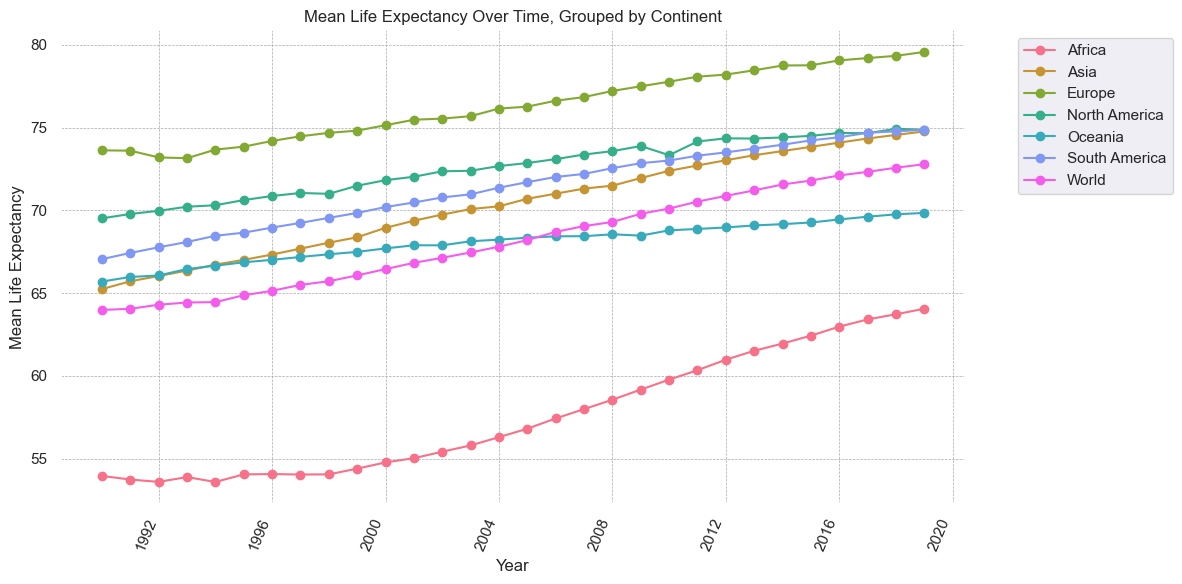

In [11]:
# Convert 'Year' to datetime format
df_life_risk['Year'] = pd.to_datetime(df_life_risk['Year'], format='%Y')

sns.set(style="darkgrid")

# Grouping the data by continent and year, calculating the mean life expectancy
numeric_columns = df_life_risk.select_dtypes(include='number').columns
grouped_df = df_life_risk.groupby(['Continent', 'Year'])[numeric_columns].mean().reset_index()

# Plotting the mean life expectancy against Year for each continent
plt.figure(figsize=(12, 6))

# Define a color palette for each continent
palette = sns.color_palette("husl", n_colors=len(grouped_df['Continent'].unique()))

for i, (name, group) in enumerate(grouped_df.groupby('Continent')):
    plt.plot(group['Year'], group['Life_Expectancy'], marker='o', label=name, color=palette[i])

plt.title('Mean Life Expectancy Over Time, Grouped by Continent')
plt.xlabel('Year')
plt.ylabel('Mean Life Expectancy')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Include each year in the plot
plt.xticks(rotation=67.5, ha='right')
plt.grid(True)
plt.tight_layout()

plt.gca().set_facecolor('white')

plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.show()


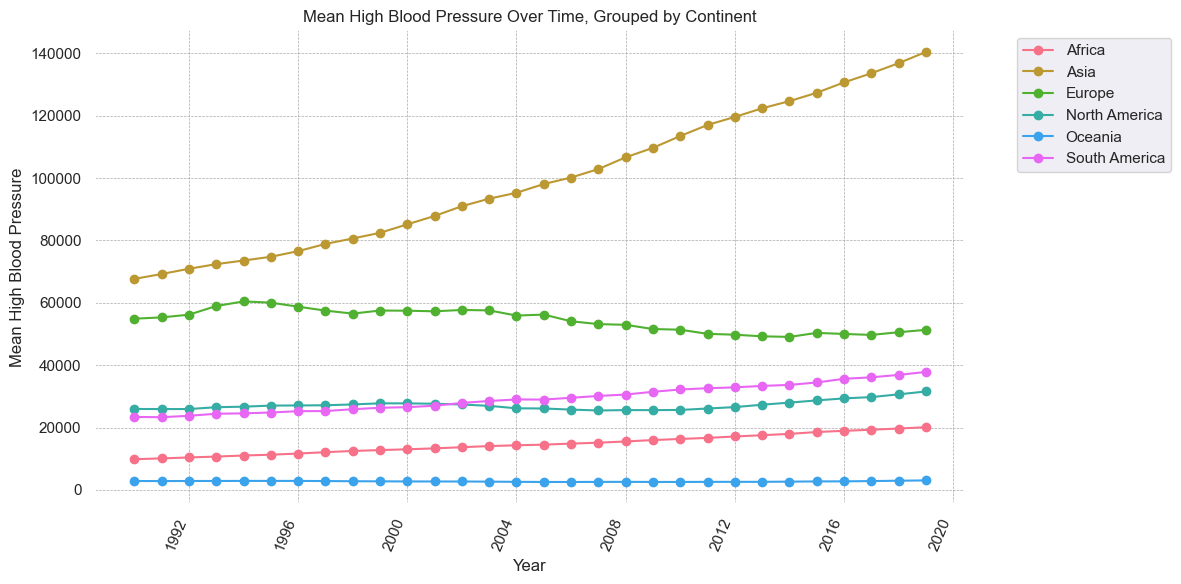

In [12]:
# Convert 'Year' to datetime format
df_life_risk['Year'] = pd.to_datetime(df_life_risk['Year'], format='%Y')

# Using seaborn for a better appearance
sns.set(style="darkgrid")

# Exclude 'World' data
df_life_risk_continents = df_life_risk[df_life_risk['Continent'] != 'World']

# Grouping the data by continent and year, calculating the mean high blood pressure
numeric_columns = df_life_risk_continents.select_dtypes(include='number').columns
grouped_df = df_life_risk_continents.groupby(['Continent', 'Year'])[numeric_columns].mean().reset_index()

# Plotting the mean high blood pressure against Year for each continent
plt.figure(figsize=(12, 6))

# Define a color palette for each continent
palette = sns.color_palette("husl", n_colors=len(grouped_df['Continent'].unique()))

for i, (name, group) in enumerate(grouped_df.groupby('Continent')):
    plt.plot(group['Year'], group['High_Blood_Pressure'], marker='o', label=name, color=palette[i])

plt.title('Mean High Blood Pressure Over Time, Grouped by Continent')
plt.xlabel('Year')
plt.ylabel('Mean High Blood Pressure')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Include each year in the plot
plt.xticks(rotation=67.5, ha='right')
plt.grid(True)
plt.tight_layout()

plt.gca().set_facecolor('white')

plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.show()


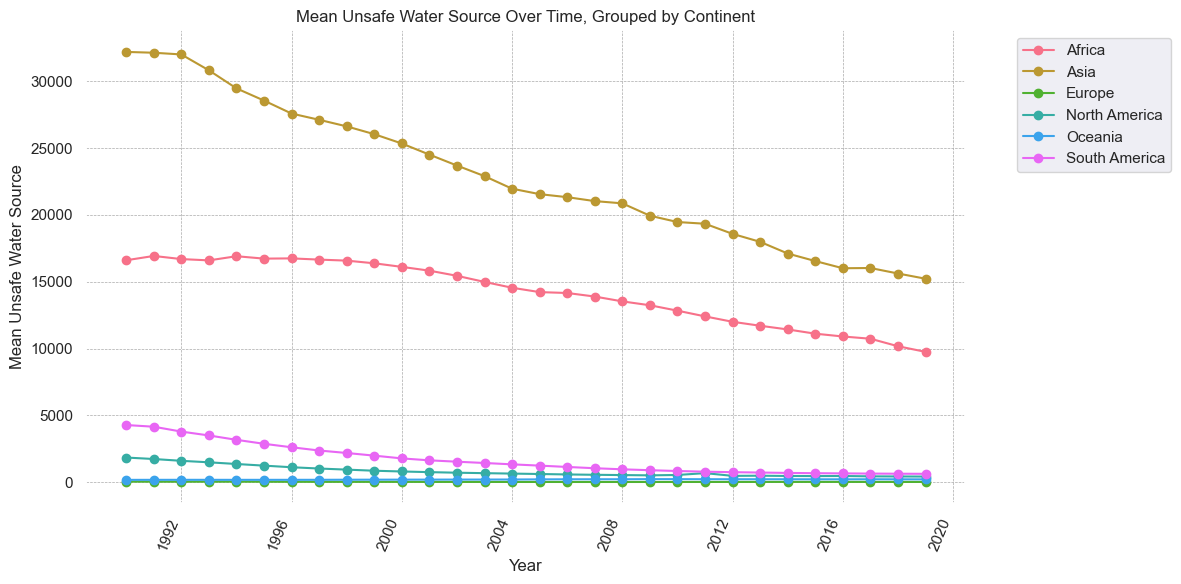

In [13]:
# Convert 'Year' to datetime format
df_life_risk['Year'] = pd.to_datetime(df_life_risk['Year'], format='%Y')

# Filter out rows where Continent is 'World'
filtered_df = df_life_risk[df_life_risk['Continent'] != 'World']

# Using seaborn for a better appearance
sns.set(style="darkgrid")

# Grouping the data by continent and year, calculating the mean unsafe water source
numeric_columns = filtered_df.select_dtypes(include='number').columns
grouped_df = filtered_df.groupby(['Continent', 'Year'])[numeric_columns].mean().reset_index()

# Plotting the mean unsafe water source against Year for each continent
plt.figure(figsize=(12, 6))

# Define a color palette for each continent
palette = sns.color_palette("husl", n_colors=len(grouped_df['Continent'].unique()))

for i, (name, group) in enumerate(grouped_df.groupby('Continent')):
    plt.plot(group['Year'], group['Unsafe_Water_Source'], marker='o', label=name, color=palette[i])

plt.title('Mean Unsafe Water Source Over Time, Grouped by Continent')
plt.xlabel('Year')
plt.ylabel('Mean Unsafe Water Source')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Include each year in the plot
plt.xticks(rotation=67.5, ha='right')
plt.grid(True)
plt.tight_layout()

plt.gca().set_facecolor('white')

plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.show()


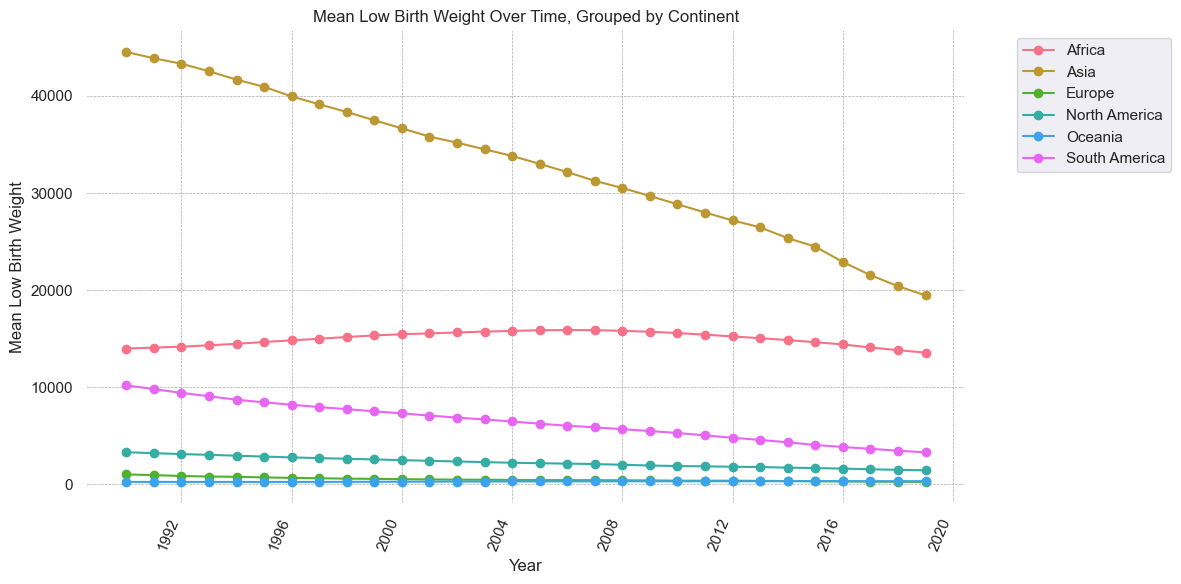

In [14]:
# Convert 'Year' to datetime format
df_life_risk['Year'] = pd.to_datetime(df_life_risk['Year'], format='%Y')

# Filter out rows where Continent is 'World'
filtered_df = df_life_risk[df_life_risk['Continent'] != 'World']

# Using seaborn for a better appearance
sns.set(style="darkgrid")

# Grouping the data by continent and year, calculating the mean low birth weight
numeric_columns = filtered_df.select_dtypes(include='number').columns
grouped_df = filtered_df.groupby(['Continent', 'Year'])[numeric_columns].mean().reset_index()

# Plotting the mean low birth weight against Year for each continent
plt.figure(figsize=(12, 6))

# Define a color palette for each continent
palette = sns.color_palette("husl", n_colors=len(grouped_df['Continent'].unique()))

for i, (name, group) in enumerate(grouped_df.groupby('Continent')):
    plt.plot(group['Year'], group['Low_Birth_Weight'], marker='o', label=name, color=palette[i])

plt.title('Mean Low Birth Weight Over Time, Grouped by Continent')
plt.xlabel('Year')
plt.ylabel('Mean Low Birth Weight')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Include each year in the plot
plt.xticks(rotation=67.5, ha='right')
plt.grid(True)
plt.tight_layout()

plt.gca().set_facecolor('white')

plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.show()


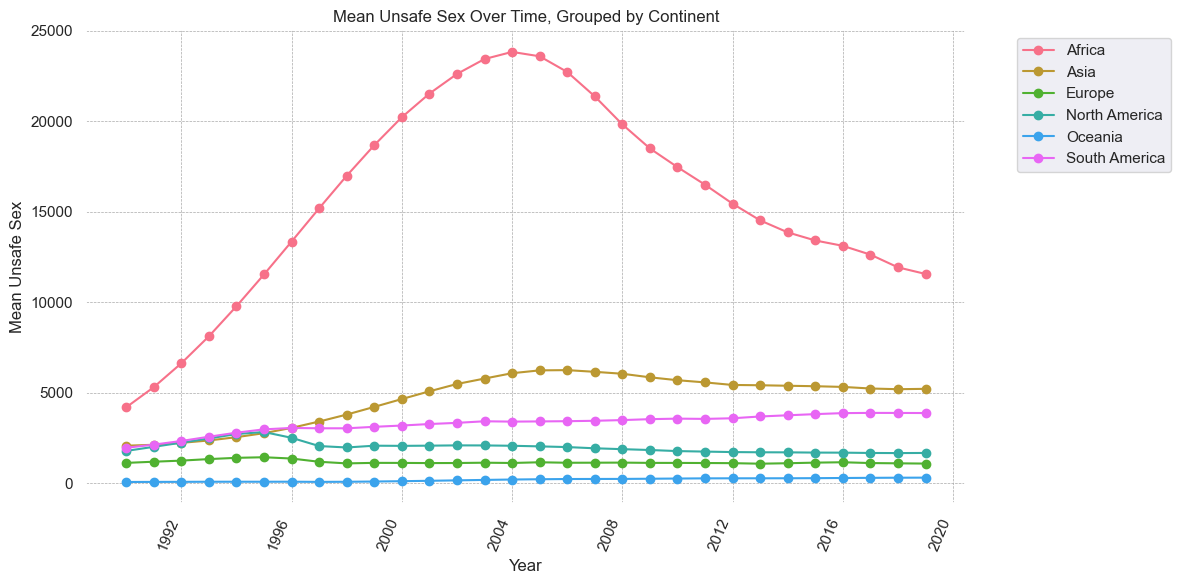

In [15]:
# Convert 'Year' to datetime format
df_life_risk['Year'] = pd.to_datetime(df_life_risk['Year'], format='%Y')

# Filter out rows where Continent is 'World'
filtered_df = df_life_risk[df_life_risk['Continent'] != 'World']

# Using seaborn for a better appearance
sns.set(style="darkgrid")

# Grouping the data by continent and year, calculating the mean unsafe sex
numeric_columns = filtered_df.select_dtypes(include='number').columns
grouped_df = filtered_df.groupby(['Continent', 'Year'])[numeric_columns].mean().reset_index()

# Plotting the mean unsafe sex against Year for each continent
plt.figure(figsize=(12, 6))

# Define a color palette for each continent
palette = sns.color_palette("husl", n_colors=len(grouped_df['Continent'].unique()))

for i, (name, group) in enumerate(grouped_df.groupby('Continent')):
    plt.plot(group['Year'], group['Unsafe_Sex'], marker='o', label=name, color=palette[i])

plt.title('Mean Unsafe Sex Over Time, Grouped by Continent')
plt.xlabel('Year')
plt.ylabel('Mean Unsafe Sex')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Include each year in the plot
plt.xticks(rotation=67.5, ha='right')
plt.grid(True)
plt.tight_layout()

plt.gca().set_facecolor('white')

plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.show()


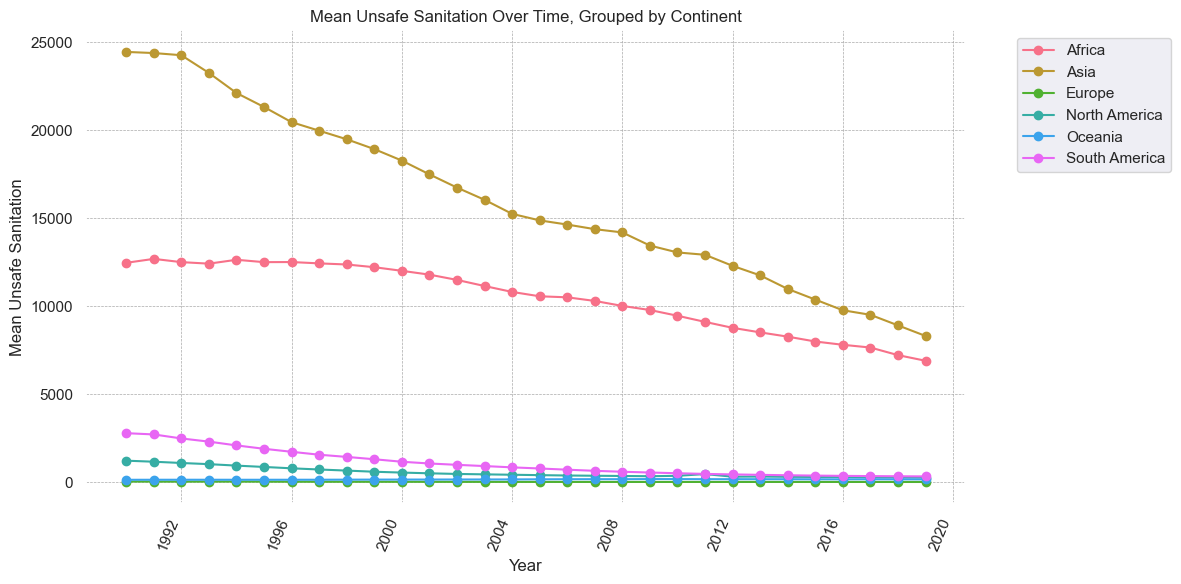

In [16]:
df_life_risk['Year'] = pd.to_datetime(df_life_risk['Year'], format='%Y')

# Filter out rows where Continent is 'World'
filtered_df = df_life_risk[df_life_risk['Continent'] != 'World']

# Using seaborn for a better appearance
sns.set(style="darkgrid")

# Grouping the data by continent and year, calculating the mean unsafe sanitation
numeric_columns = filtered_df.select_dtypes(include='number').columns
grouped_df = filtered_df.groupby(['Continent', 'Year'])[numeric_columns].mean().reset_index()

# Plotting the mean unsafe sanitation against Year for each continent
plt.figure(figsize=(12, 6))

# Define a color palette for each continent
palette = sns.color_palette("husl", n_colors=len(grouped_df['Continent'].unique()))

for i, (name, group) in enumerate(grouped_df.groupby('Continent')):
    plt.plot(group['Year'], group['Unsafe_Sanitation'], marker='o', label=name, color=palette[i])

plt.title('Mean Unsafe Sanitation Over Time, Grouped by Continent')
plt.xlabel('Year')
plt.ylabel('Mean Unsafe Sanitation')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Include each year in the plot
plt.xticks(rotation=67.5, ha='right')
plt.grid(True)
plt.tight_layout()

plt.gca().set_facecolor('white')

plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)


plt.show()


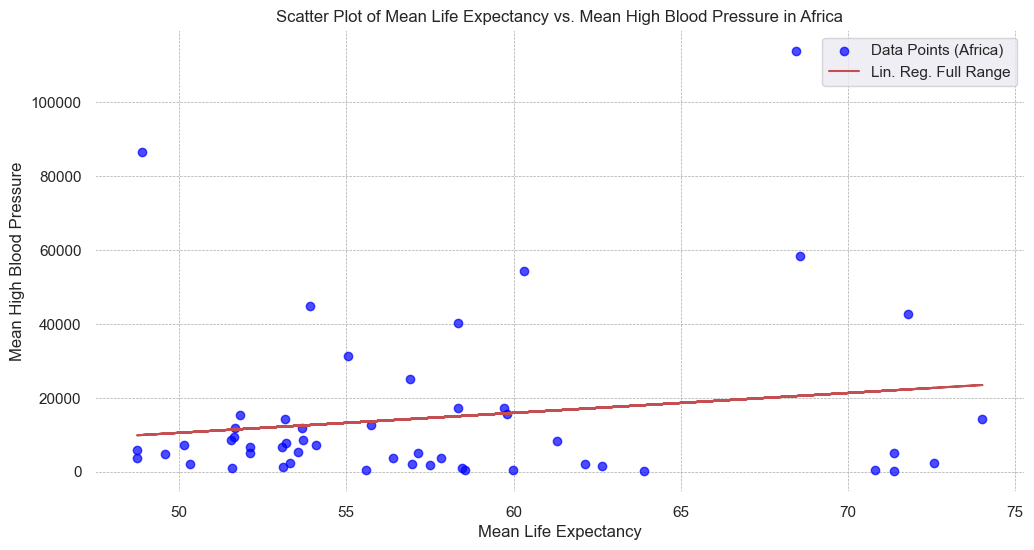

Correlation coefficient: 0.17897937534600894


In [17]:
# Filter data for Africa
africa_df = df_life_risk[df_life_risk['Continent'] == 'Africa']

# Calculate the mean of GDP and fertility for each country in Africa
mean_life_exp = africa_df.groupby('Entity')['Life_Expectancy'].mean()
mean_blood_pressure = africa_df.groupby('Entity')['High_Blood_Pressure'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp, mean_blood_pressure, alpha=0.7,label="Data Points (Africa)", color='blue')

# Linear regression line
lin_reg_m_tot, lin_reg_q_tot = linear_regression(mean_life_exp, mean_blood_pressure)
y_tot = mean_life_exp*lin_reg_m_tot+lin_reg_q_tot
plt.plot(mean_life_exp, y_tot, label="Lin. Reg. Full Range",color ='r')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean High Blood Pressure in Africa')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean High Blood Pressure')
plt.show()

# Correlation Coefficient

result = correlation_coefficient(africa_df, "Life_Expectancy", "High_Blood_Pressure")
print(f"Correlation coefficient: {result}")

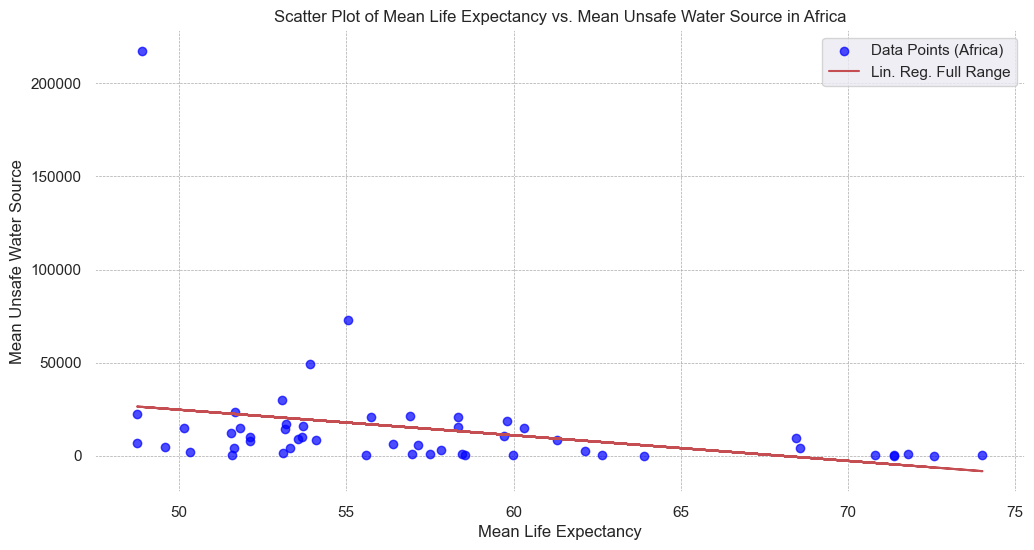

Correlation coefficient: -0.2825135858370755


In [18]:
# Filter data for Africa
africa_df = df_life_risk[df_life_risk['Continent'] == 'Africa']

# Calculate the mean of Life Expectancy and Unsafe Water Source for each country in Africa
mean_life_exp = africa_df.groupby('Entity')['Life_Expectancy'].mean()
mean_unsafe_water = africa_df.groupby('Entity')['Unsafe_Water_Source'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp, mean_unsafe_water, alpha=0.7, label="Data Points (Africa)", color='blue')

# Linear regression line
lin_reg_m_tot, lin_reg_q_tot = linear_regression(mean_life_exp, mean_unsafe_water)
y_tot = mean_life_exp * lin_reg_m_tot + lin_reg_q_tot
plt.plot(mean_life_exp, y_tot, label="Lin. Reg. Full Range", color='r')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean Unsafe Water Source in Africa')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean Unsafe Water Source')
plt.show()

# Correlation Coefficient
result = correlation_coefficient(africa_df, "Life_Expectancy", "Unsafe_Water_Source")
print(f"Correlation coefficient: {result}")


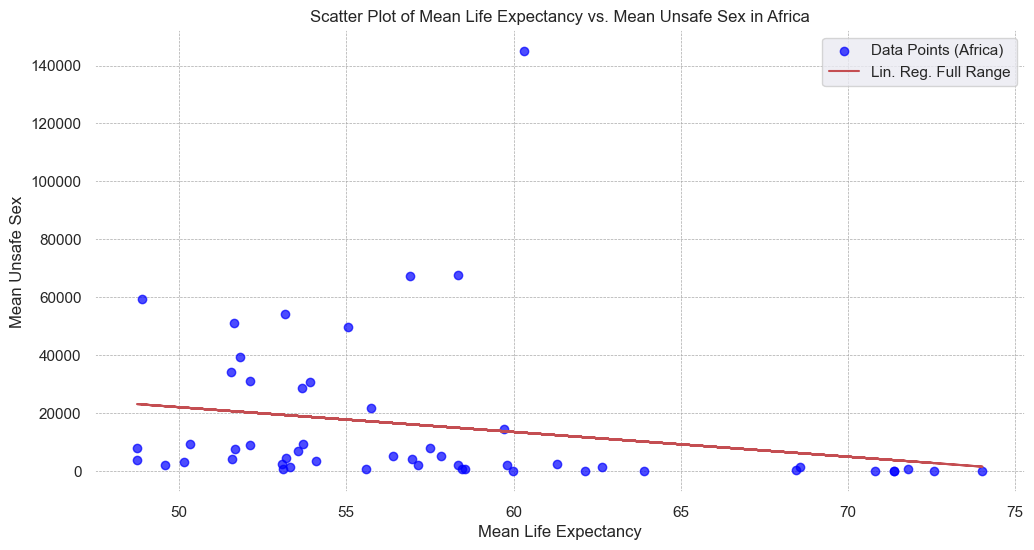

Correlation coefficient: -0.20491371139952252


In [19]:
# Filter data for Africa
africa_df = df_life_risk[df_life_risk['Continent'] == 'Africa']

# Calculate the mean of Life Expectancy and Unsafe Sex for each country in Africa
mean_life_exp = africa_df.groupby('Entity')['Life_Expectancy'].mean()
mean_unsafe_sex = africa_df.groupby('Entity')['Unsafe_Sex'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp, mean_unsafe_sex, alpha=0.7, label="Data Points (Africa)", color='blue')

# Linear regression line
lin_reg_m_tot, lin_reg_q_tot = linear_regression(mean_life_exp, mean_unsafe_sex)
y_tot = mean_life_exp * lin_reg_m_tot + lin_reg_q_tot
plt.plot(mean_life_exp, y_tot, label="Lin. Reg. Full Range", color='r')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean Unsafe Sex in Africa')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean Unsafe Sex')
plt.show()

# Correlation Coefficient
result = correlation_coefficient(africa_df, "Life_Expectancy", "Unsafe_Sex")
print(f"Correlation coefficient: {result}")


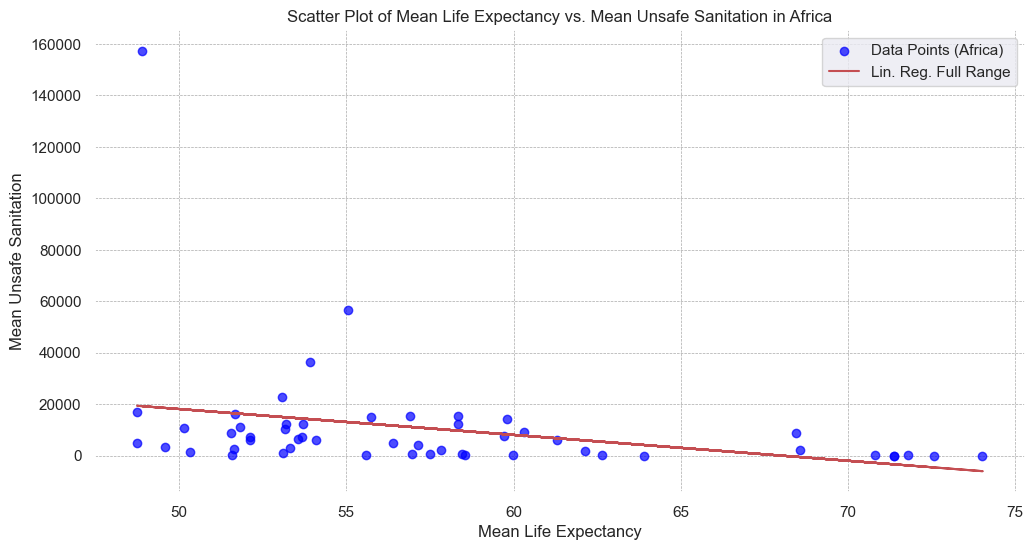

Correlation coefficient: -0.28490591293180684


In [20]:
# Filter data for Africa
africa_df = df_life_risk[df_life_risk['Continent'] == 'Africa']

# Calculate the mean of Life Expectancy and Unsafe Sanitation for each country in Africa
mean_life_exp = africa_df.groupby('Entity')['Life_Expectancy'].mean()
mean_unsafe_sanitation = africa_df.groupby('Entity')['Unsafe_Sanitation'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp, mean_unsafe_sanitation, alpha=0.7, label="Data Points (Africa)", color='blue')

# Linear regression line
lin_reg_m_tot, lin_reg_q_tot = linear_regression(mean_life_exp, mean_unsafe_sanitation)
y_tot = mean_life_exp * lin_reg_m_tot + lin_reg_q_tot
plt.plot(mean_life_exp, y_tot, label="Lin. Reg. Full Range", color='r')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean Unsafe Sanitation in Africa')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean Unsafe Sanitation')
plt.show()

# Correlation Coefficient
result = correlation_coefficient(africa_df, "Life_Expectancy", "Unsafe_Sanitation")
print(f"Correlation coefficient: {result}")


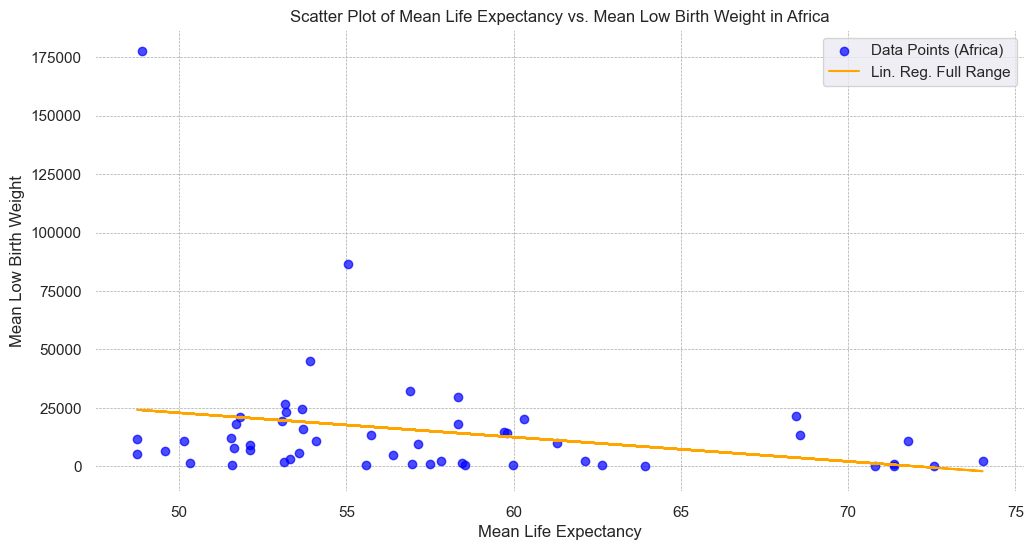

Correlation coefficient for Africa: -0.21629867622228882


In [57]:
# Filter data for Africa
africa_df = df_life_risk[df_life_risk['Continent'] == 'Africa']

# Calculate the mean of Life Expectancy and Low Birth Weight for each country in Africa
mean_life_exp_africa = africa_df.groupby('Entity')['Life_Expectancy'].mean()
mean_low_birth_weight_africa = africa_df.groupby('Entity')['Low_Birth_Weight'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp_africa, mean_low_birth_weight_africa, alpha=0.7, label="Data Points (Africa)", color='blue')

# Linear regression line
lin_reg_m_africa, lin_reg_q_africa = linear_regression(mean_life_exp_africa, mean_low_birth_weight_africa)
y_africa = mean_life_exp_africa * lin_reg_m_africa + lin_reg_q_africa
plt.plot(mean_life_exp_africa, y_africa, label="Lin. Reg. Full Range", color='orange')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean Low Birth Weight in Africa')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean Low Birth Weight')
plt.show()

# Correlation Coefficient
result_africa = correlation_coefficient(africa_df, "Life_Expectancy", "Low_Birth_Weight")
print(f"Correlation coefficient for Africa: {result_africa}")


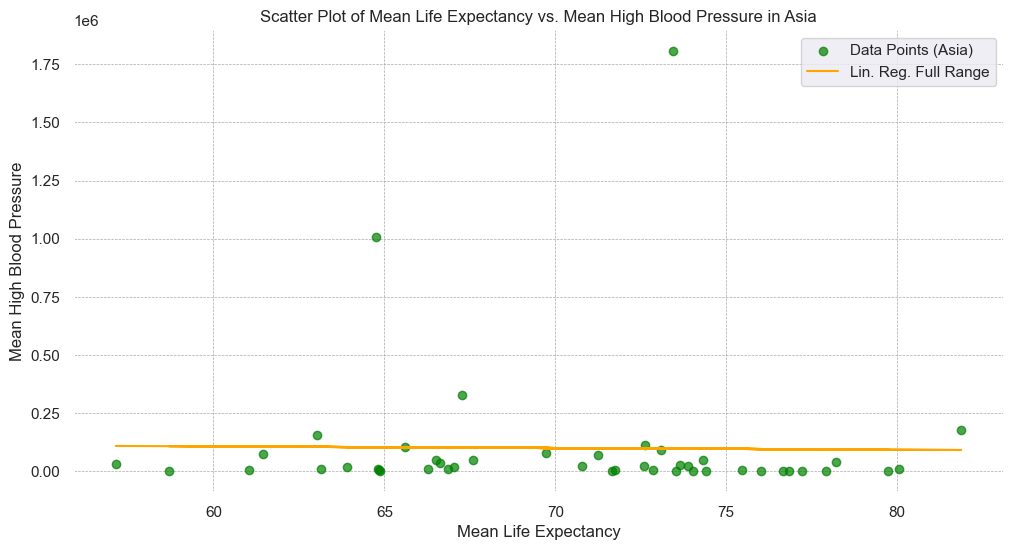

Correlation coefficient for Asia: 0.02005547434139857


In [21]:
# Filter data for Asia
asia_df = df_life_risk[df_life_risk['Continent'] == 'Asia']

# Calculate the mean of Life Expectancy and High Blood Pressure for each country in Asia
mean_life_exp_asia = asia_df.groupby('Entity')['Life_Expectancy'].mean()
mean_blood_pressure_asia = asia_df.groupby('Entity')['High_Blood_Pressure'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp_asia, mean_blood_pressure_asia, alpha=0.7, label="Data Points (Asia)", color='green')

# Linear regression line
lin_reg_m_asia, lin_reg_q_asia = linear_regression(mean_life_exp_asia, mean_blood_pressure_asia)
y_asia = mean_life_exp_asia * lin_reg_m_asia + lin_reg_q_asia
plt.plot(mean_life_exp_asia, y_asia, label="Lin. Reg. Full Range", color='orange')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean High Blood Pressure in Asia')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean High Blood Pressure')
plt.show()

# Correlation Coefficient
result_asia = correlation_coefficient(asia_df, "Life_Expectancy", "High_Blood_Pressure")
print(f"Correlation coefficient for Asia: {result_asia}")


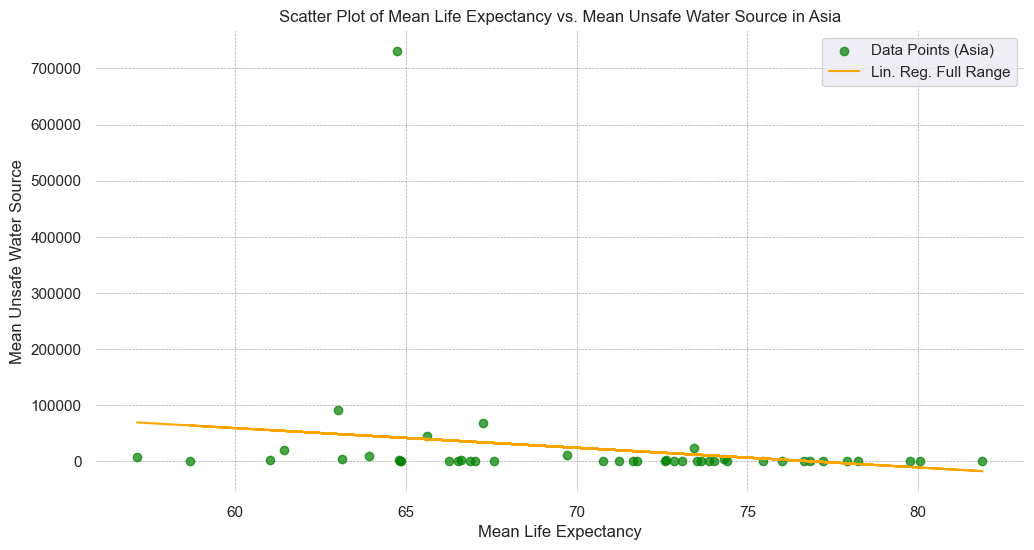

Correlation coefficient for Asia: -0.186566586950667


In [22]:
# Filter data for Asia
asia_df = df_life_risk[df_life_risk['Continent'] == 'Asia']

# Calculate the mean of Life Expectancy and Unsafe Water Source for each country in Asia
mean_life_exp_asia = asia_df.groupby('Entity')['Life_Expectancy'].mean()
mean_unsafe_water_asia = asia_df.groupby('Entity')['Unsafe_Water_Source'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp_asia, mean_unsafe_water_asia, alpha=0.7, label="Data Points (Asia)", color='green')

# Linear regression line
lin_reg_m_asia, lin_reg_q_asia = linear_regression(mean_life_exp_asia, mean_unsafe_water_asia)
y_asia = mean_life_exp_asia * lin_reg_m_asia + lin_reg_q_asia
plt.plot(mean_life_exp_asia, y_asia, label="Lin. Reg. Full Range", color='orange')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean Unsafe Water Source in Asia')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean Unsafe Water Source')
plt.show()

# Correlation Coefficient
result_asia = correlation_coefficient(asia_df, "Life_Expectancy", "Unsafe_Water_Source")
print(f"Correlation coefficient for Asia: {result_asia}")


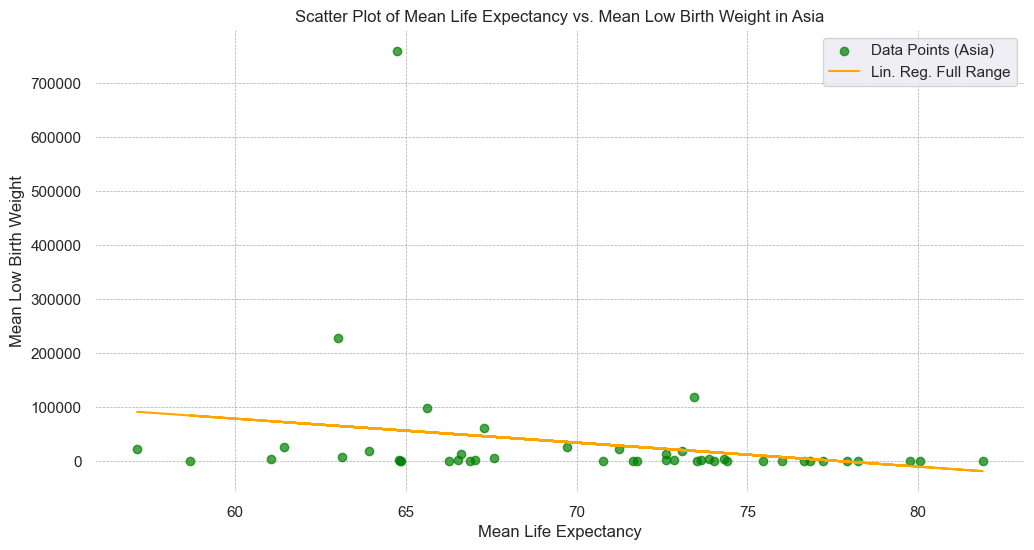

Correlation coefficient for Asia: -0.22049016824062764


In [23]:
# Filter data for Asia
asia_df = df_life_risk[df_life_risk['Continent'] == 'Asia']

# Calculate the mean of Life Expectancy and Low Birth Weight for each country in Asia
mean_life_exp_asia = asia_df.groupby('Entity')['Life_Expectancy'].mean()
mean_low_birth_weight_asia = asia_df.groupby('Entity')['Low_Birth_Weight'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp_asia, mean_low_birth_weight_asia, alpha=0.7, label="Data Points (Asia)", color='green')

# Linear regression line
lin_reg_m_asia, lin_reg_q_asia = linear_regression(mean_life_exp_asia, mean_low_birth_weight_asia)
y_asia = mean_life_exp_asia * lin_reg_m_asia + lin_reg_q_asia
plt.plot(mean_life_exp_asia, y_asia, label="Lin. Reg. Full Range", color='orange')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean Low Birth Weight in Asia')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean Low Birth Weight')
plt.show()

# Correlation Coefficient
result_asia = correlation_coefficient(asia_df, "Life_Expectancy", "Low_Birth_Weight")
print(f"Correlation coefficient for Asia: {result_asia}")


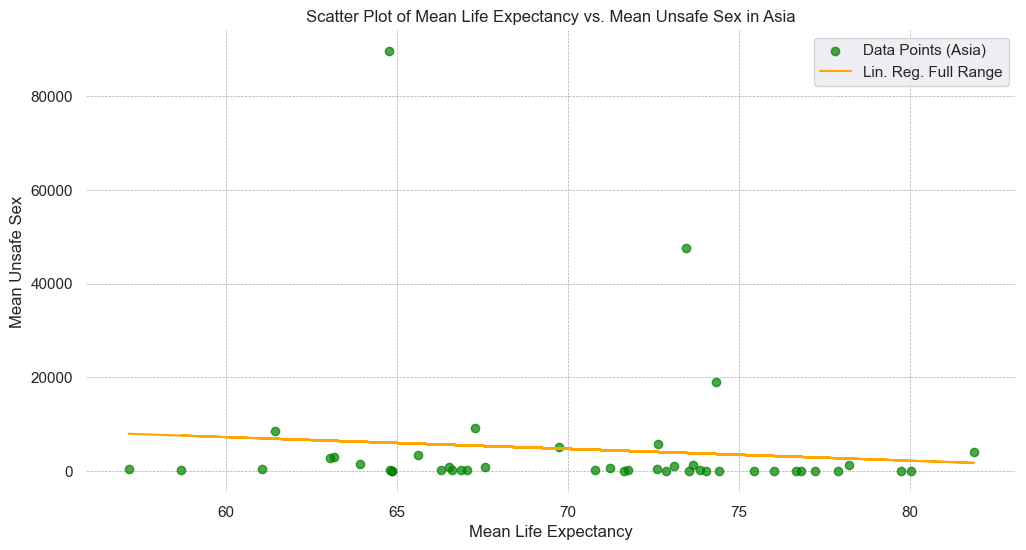

Correlation coefficient for Asia: -0.049665130847067494


In [24]:
# Filter data for Asia
asia_df = df_life_risk[df_life_risk['Continent'] == 'Asia']

# Calculate the mean of Life Expectancy and Unsafe Sex for each country in Asia
mean_life_exp_asia = asia_df.groupby('Entity')['Life_Expectancy'].mean()
mean_unsafe_sex_asia = asia_df.groupby('Entity')['Unsafe_Sex'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp_asia, mean_unsafe_sex_asia, alpha=0.7, label="Data Points (Asia)", color='green')

# Linear regression line
lin_reg_m_asia, lin_reg_q_asia = linear_regression(mean_life_exp_asia, mean_unsafe_sex_asia)
y_asia = mean_life_exp_asia * lin_reg_m_asia + lin_reg_q_asia
plt.plot(mean_life_exp_asia, y_asia, label="Lin. Reg. Full Range", color='orange')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean Unsafe Sex in Asia')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean Unsafe Sex')
plt.show()

# Correlation Coefficient
result_asia = correlation_coefficient(asia_df, "Life_Expectancy", "Unsafe_Sex")
print(f"Correlation coefficient for Asia: {result_asia}")


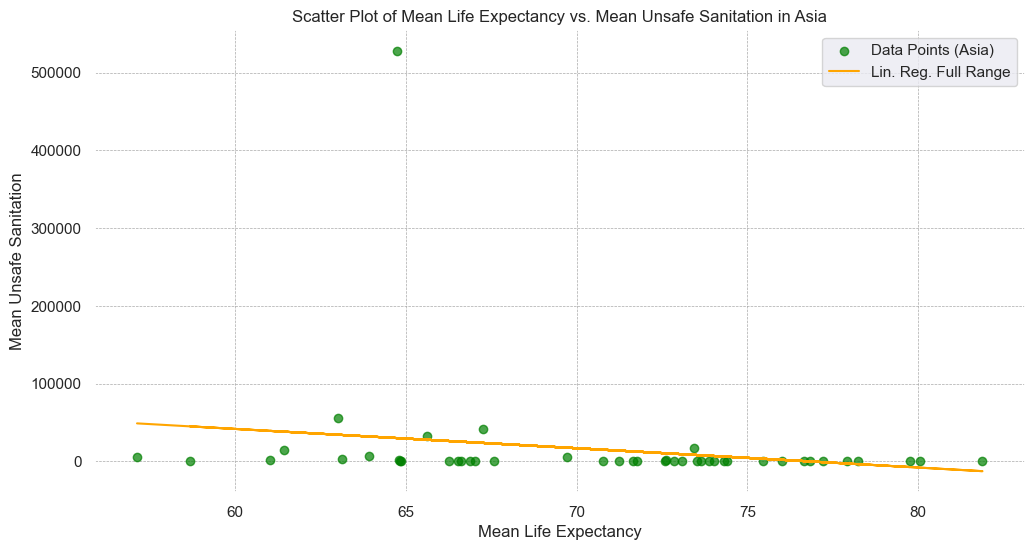

Correlation coefficient for Asia: -0.18787906568808163


In [25]:
# Filter data for Asia
asia_df = df_life_risk[df_life_risk['Continent'] == 'Asia']

# Calculate the mean of Life Expectancy and Unsafe Sanitation for each country in Asia
mean_life_exp_asia = asia_df.groupby('Entity')['Life_Expectancy'].mean()
mean_unsafe_sanitation_asia = asia_df.groupby('Entity')['Unsafe_Sanitation'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp_asia, mean_unsafe_sanitation_asia, alpha=0.7, label="Data Points (Asia)", color='green')

# Linear regression line
lin_reg_m_asia, lin_reg_q_asia = linear_regression(mean_life_exp_asia, mean_unsafe_sanitation_asia)
y_asia = mean_life_exp_asia * lin_reg_m_asia + lin_reg_q_asia
plt.plot(mean_life_exp_asia, y_asia, label="Lin. Reg. Full Range", color='orange')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean Unsafe Sanitation in Asia')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean Unsafe Sanitation')
plt.show()

# Correlation Coefficient
result_asia = correlation_coefficient(asia_df, "Life_Expectancy", "Unsafe_Sanitation")
print(f"Correlation coefficient for Asia: {result_asia}")

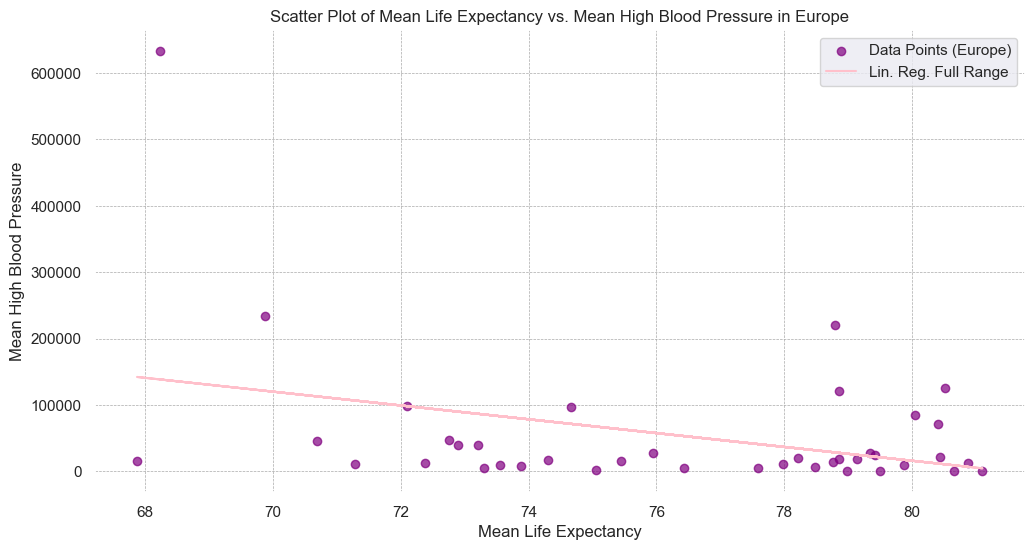

Correlation coefficient for Europe: -0.31855895695078523


In [26]:
# Filter data for Europe
europe_df = df_life_risk[df_life_risk['Continent'] == 'Europe']

# Calculate the mean of Life Expectancy and High Blood Pressure for each country in Europe
mean_life_exp_europe = europe_df.groupby('Entity')['Life_Expectancy'].mean()
mean_blood_pressure_europe = europe_df.groupby('Entity')['High_Blood_Pressure'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp_europe, mean_blood_pressure_europe, alpha=0.7, label="Data Points (Europe)", color='purple')

# Linear regression line
lin_reg_m_europe, lin_reg_q_europe = linear_regression(mean_life_exp_europe, mean_blood_pressure_europe)
y_europe = mean_life_exp_europe * lin_reg_m_europe + lin_reg_q_europe
plt.plot(mean_life_exp_europe, y_europe, label="Lin. Reg. Full Range", color='pink')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean High Blood Pressure in Europe')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean High Blood Pressure')
plt.show()

# Correlation Coefficient
result_europe = correlation_coefficient(europe_df, "Life_Expectancy", "High_Blood_Pressure")
print(f"Correlation coefficient for Europe: {result_europe}")


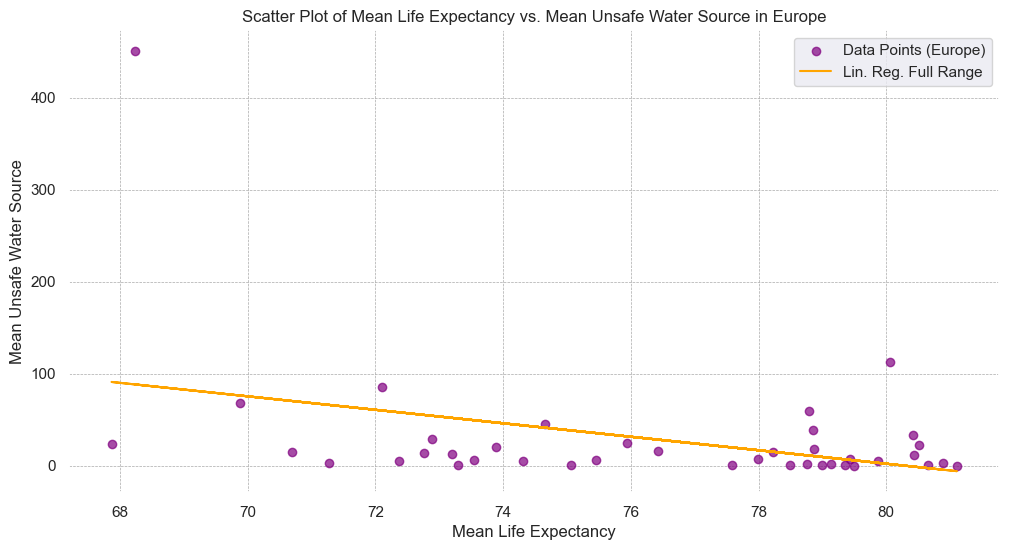

Correlation coefficient for Europe: -0.30383698615165305


In [27]:
# Filter data for Europe
europe_df = df_life_risk[df_life_risk['Continent'] == 'Europe']

# Calculate the mean of Life Expectancy and Unsafe Water Source for each country in Europe
mean_life_exp_europe = europe_df.groupby('Entity')['Life_Expectancy'].mean()
mean_unsafe_water_europe = europe_df.groupby('Entity')['Unsafe_Water_Source'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp_europe, mean_unsafe_water_europe, alpha=0.7, label="Data Points (Europe)", color='purple')

# Linear regression line
lin_reg_m_europe, lin_reg_q_europe = linear_regression(mean_life_exp_europe, mean_unsafe_water_europe)
y_europe = mean_life_exp_europe * lin_reg_m_europe + lin_reg_q_europe
plt.plot(mean_life_exp_europe, y_europe, label="Lin. Reg. Full Range", color='orange')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean Unsafe Water Source in Europe')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean Unsafe Water Source')
plt.show()

# Correlation Coefficient
result_europe = correlation_coefficient(europe_df, "Life_Expectancy", "Unsafe_Water_Source")
print(f"Correlation coefficient for Europe: {result_europe}")


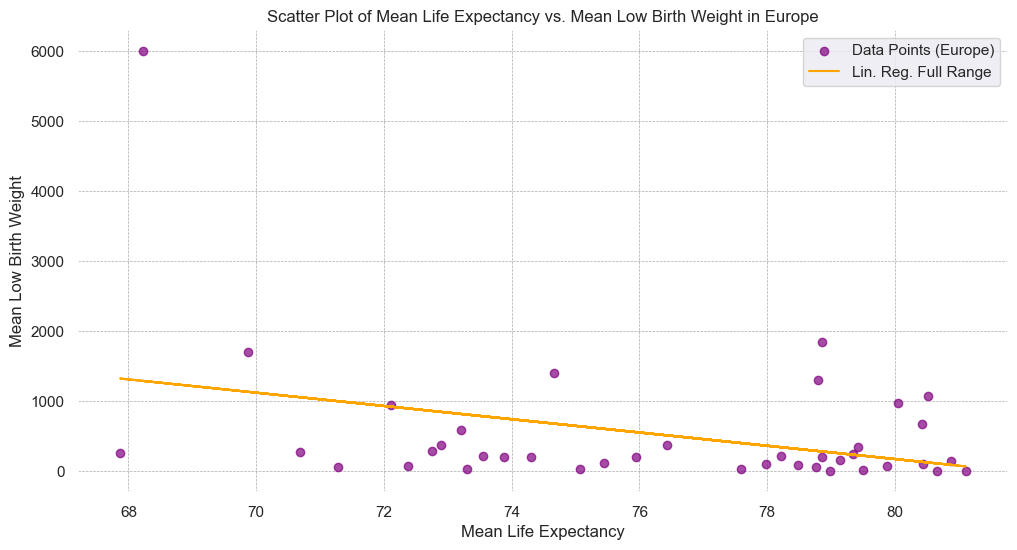

Correlation coefficient for Europe: -0.3495679009458733


In [28]:
# Filter data for Europe
europe_df = df_life_risk[df_life_risk['Continent'] == 'Europe']

# Calculate the mean of Life Expectancy and Low Birth Weight for each country in Europe
mean_life_exp_europe = europe_df.groupby('Entity')['Life_Expectancy'].mean()
mean_low_birth_weight_europe = europe_df.groupby('Entity')['Low_Birth_Weight'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp_europe, mean_low_birth_weight_europe, alpha=0.7, label="Data Points (Europe)", color='purple')

# Linear regression line
lin_reg_m_europe, lin_reg_q_europe = linear_regression(mean_life_exp_europe, mean_low_birth_weight_europe)
y_europe = mean_life_exp_europe * lin_reg_m_europe + lin_reg_q_europe
plt.plot(mean_life_exp_europe, y_europe, label="Lin. Reg. Full Range", color='orange')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean Low Birth Weight in Europe')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean Low Birth Weight')
plt.show()

# Correlation Coefficient
result_europe = correlation_coefficient(europe_df, "Life_Expectancy", "Low_Birth_Weight")
print(f"Correlation coefficient for Europe: {result_europe}")


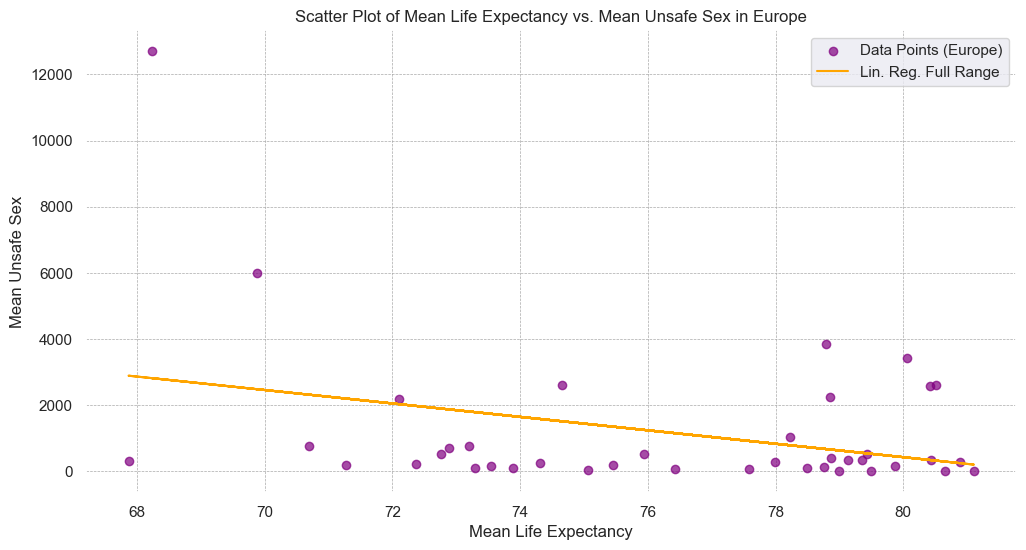

Correlation coefficient for Europe: -0.28247310601283454


In [29]:
# Filter data for Europe
europe_df = df_life_risk[df_life_risk['Continent'] == 'Europe']

# Calculate the mean of Life Expectancy and Unsafe Sex for each country in Europe
mean_life_exp_europe = europe_df.groupby('Entity')['Life_Expectancy'].mean()
mean_unsafe_sex_europe = europe_df.groupby('Entity')['Unsafe_Sex'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp_europe, mean_unsafe_sex_europe, alpha=0.7, label="Data Points (Europe)", color='purple')

# Linear regression line
lin_reg_m_europe, lin_reg_q_europe = linear_regression(mean_life_exp_europe, mean_unsafe_sex_europe)
y_europe = mean_life_exp_europe * lin_reg_m_europe + lin_reg_q_europe
plt.plot(mean_life_exp_europe, y_europe, label="Lin. Reg. Full Range", color='orange')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean Unsafe Sex in Europe')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean Unsafe Sex')
plt.show()

# Correlation Coefficient
result_europe = correlation_coefficient(europe_df, "Life_Expectancy", "Unsafe_Sex")
print(f"Correlation coefficient for Europe: {result_europe}")


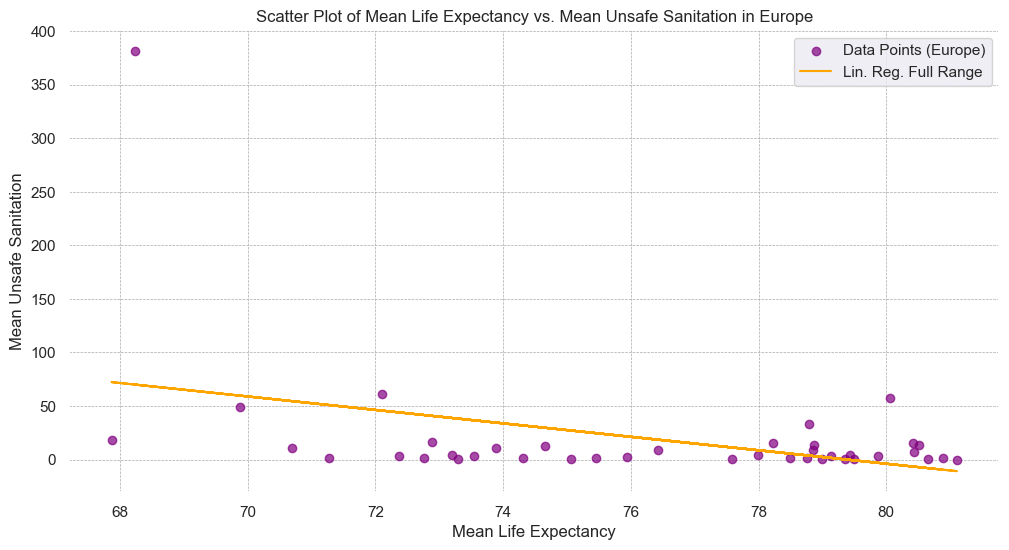

Correlation coefficient for Europe: -0.3224216425817401


In [30]:
# Filter data for Europe
europe_df = df_life_risk[df_life_risk['Continent'] == 'Europe']

# Calculate the mean of Life Expectancy and Unsafe Sanitation for each country in Europe
mean_life_exp_europe = europe_df.groupby('Entity')['Life_Expectancy'].mean()
mean_unsafe_sanitation_europe = europe_df.groupby('Entity')['Unsafe_Sanitation'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp_europe, mean_unsafe_sanitation_europe, alpha=0.7, label="Data Points (Europe)", color='purple')

# Linear regression line
lin_reg_m_europe, lin_reg_q_europe = linear_regression(mean_life_exp_europe, mean_unsafe_sanitation_europe)
y_europe = mean_life_exp_europe * lin_reg_m_europe + lin_reg_q_europe
plt.plot(mean_life_exp_europe, y_europe, label="Lin. Reg. Full Range", color='orange')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean Unsafe Sanitation in Europe')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean Unsafe Sanitation')
plt.show()

# Correlation Coefficient
result_europe = correlation_coefficient(europe_df, "Life_Expectancy", "Unsafe_Sanitation")
print(f"Correlation coefficient for Europe: {result_europe}")


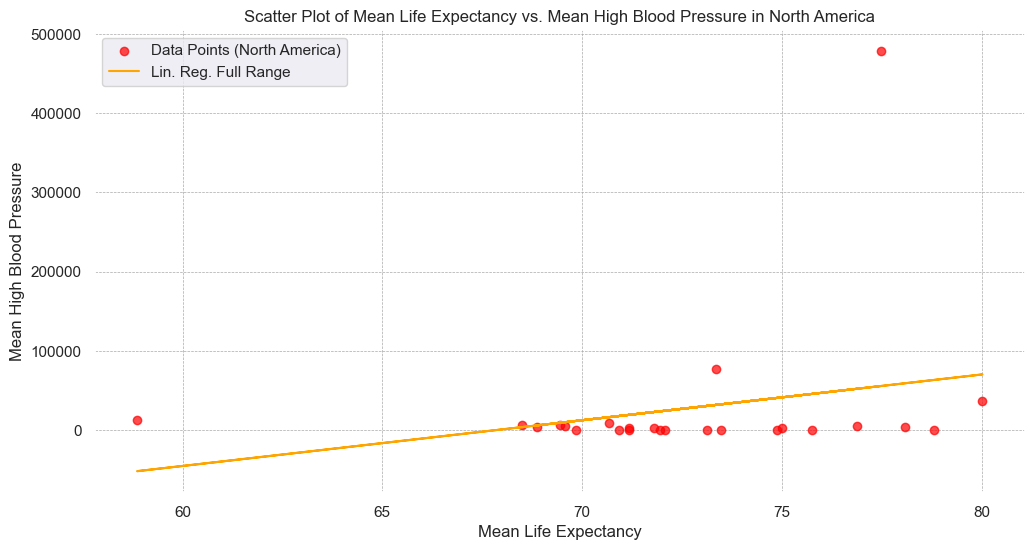

Correlation coefficient for North America: 0.22665918899243795


In [31]:
# Filter data for North America
north_america_df = df_life_risk[df_life_risk['Continent'] == 'North America']

# Calculate the mean of Life Expectancy and High Blood Pressure for each country in North America
mean_life_exp_north_america = north_america_df.groupby('Entity')['Life_Expectancy'].mean()
mean_blood_pressure_north_america = north_america_df.groupby('Entity')['High_Blood_Pressure'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp_north_america, mean_blood_pressure_north_america, alpha=0.7, label="Data Points (North America)", color='red')

# Linear regression line
lin_reg_m_north_america, lin_reg_q_north_america = linear_regression(mean_life_exp_north_america, mean_blood_pressure_north_america)
y_north_america = mean_life_exp_north_america * lin_reg_m_north_america + lin_reg_q_north_america
plt.plot(mean_life_exp_north_america, y_north_america, label="Lin. Reg. Full Range", color='orange')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean High Blood Pressure in North America')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean High Blood Pressure')
plt.show()

# Correlation Coefficient
result_north_america = correlation_coefficient(north_america_df, "Life_Expectancy", "High_Blood_Pressure")
print(f"Correlation coefficient for North America: {result_north_america}")


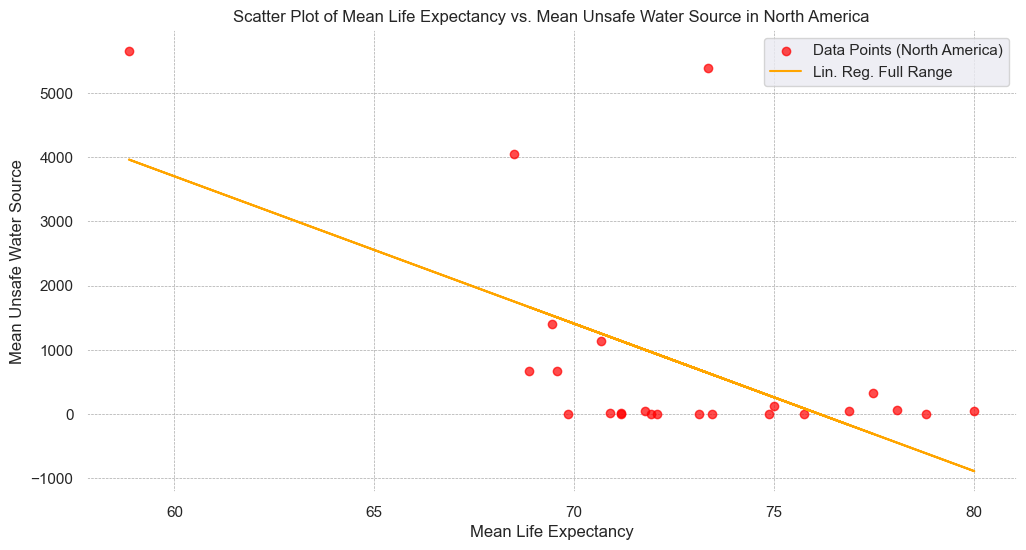

Correlation coefficient for North America: -0.5380568076007701


In [32]:
# Filter data for North America
north_america_df = df_life_risk[df_life_risk['Continent'] == 'North America']

# Calculate the mean of Life Expectancy and Unsafe Water Source for each country in North America
mean_life_exp_na = north_america_df.groupby('Entity')['Life_Expectancy'].mean()
mean_unsafe_water_na = north_america_df.groupby('Entity')['Unsafe_Water_Source'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp_na, mean_unsafe_water_na, alpha=0.7, label="Data Points (North America)", color='red')

# Linear regression line
lin_reg_m_na, lin_reg_q_na = linear_regression(mean_life_exp_na, mean_unsafe_water_na)
y_na = mean_life_exp_na * lin_reg_m_na + lin_reg_q_na
plt.plot(mean_life_exp_na, y_na, label="Lin. Reg. Full Range", color='orange')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean Unsafe Water Source in North America')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean Unsafe Water Source')
plt.show()

# Correlation Coefficient
result_na = correlation_coefficient(north_america_df, "Life_Expectancy", "Unsafe_Water_Source")
print(f"Correlation coefficient for North America: {result_na}")


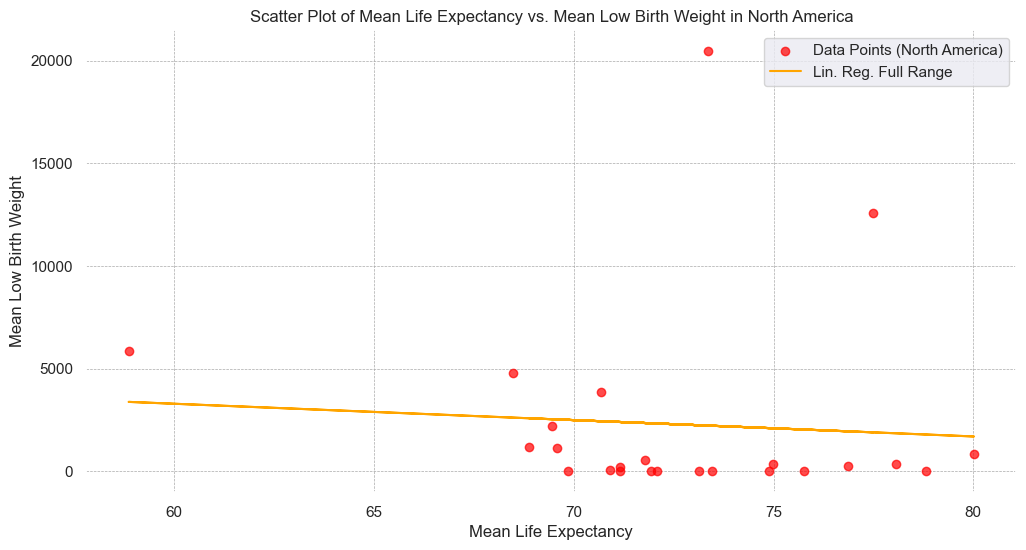

Correlation coefficient for North America: -0.09923897715002493


In [33]:
# Filter data for North America
north_america_df = df_life_risk[df_life_risk['Continent'] == 'North America']

# Calculate the mean of Life Expectancy and Low Birth Weight for each country in North America
mean_life_exp_na = north_america_df.groupby('Entity')['Life_Expectancy'].mean()
mean_low_birth_weight_na = north_america_df.groupby('Entity')['Low_Birth_Weight'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp_na, mean_low_birth_weight_na, alpha=0.7, label="Data Points (North America)", color='red')

# Linear regression line
lin_reg_m_na, lin_reg_q_na = linear_regression(mean_life_exp_na, mean_low_birth_weight_na)
y_na = mean_life_exp_na * lin_reg_m_na + lin_reg_q_na
plt.plot(mean_life_exp_na, y_na, label="Lin. Reg. Full Range", color='orange')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean Low Birth Weight in North America')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean Low Birth Weight')
plt.show()

# Correlation Coefficient
result_na = correlation_coefficient(north_america_df, "Life_Expectancy", "Low_Birth_Weight")
print(f"Correlation coefficient for North America: {result_na}")


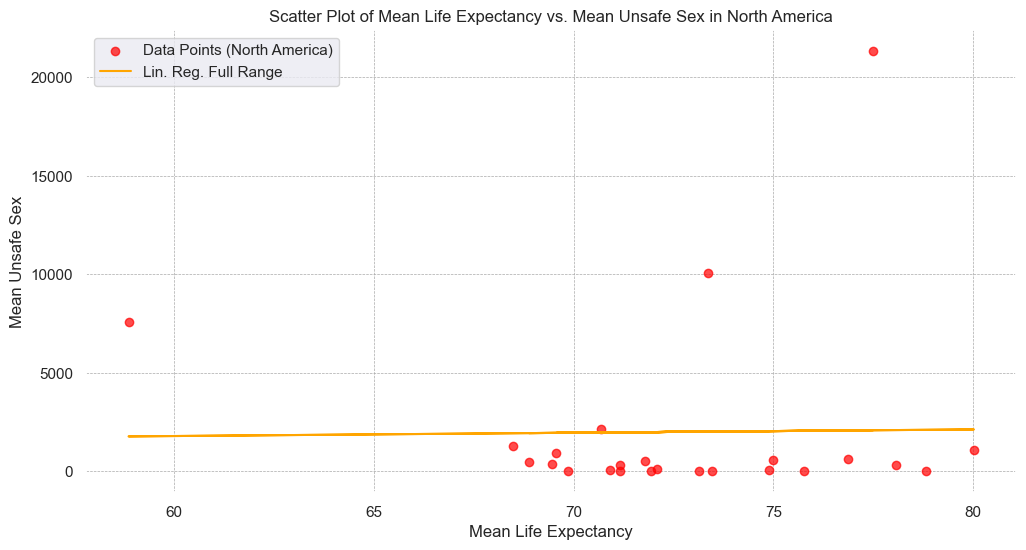

Correlation coefficient for North America: 0.00490393192837432


In [34]:
# Filter data for North America
north_america_df = df_life_risk[df_life_risk['Continent'] == 'North America']

# Calculate the mean of Life Expectancy and Unsafe Sex for each country in North America
mean_life_exp_north_america = north_america_df.groupby('Entity')['Life_Expectancy'].mean()
mean_unsafe_sex_north_america = north_america_df.groupby('Entity')['Unsafe_Sex'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp_north_america, mean_unsafe_sex_north_america, alpha=0.7, label="Data Points (North America)", color='red')

# Linear regression line
lin_reg_m_north_america, lin_reg_q_north_america = linear_regression(mean_life_exp_north_america, mean_unsafe_sex_north_america)
y_north_america = mean_life_exp_north_america * lin_reg_m_north_america + lin_reg_q_north_america
plt.plot(mean_life_exp_north_america, y_north_america, label="Lin. Reg. Full Range", color='orange')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean Unsafe Sex in North America')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean Unsafe Sex')
plt.show()

# Correlation Coefficient
result_north_america = correlation_coefficient(north_america_df, "Life_Expectancy", "Unsafe_Sex")
print(f"Correlation coefficient for North America: {result_north_america}")


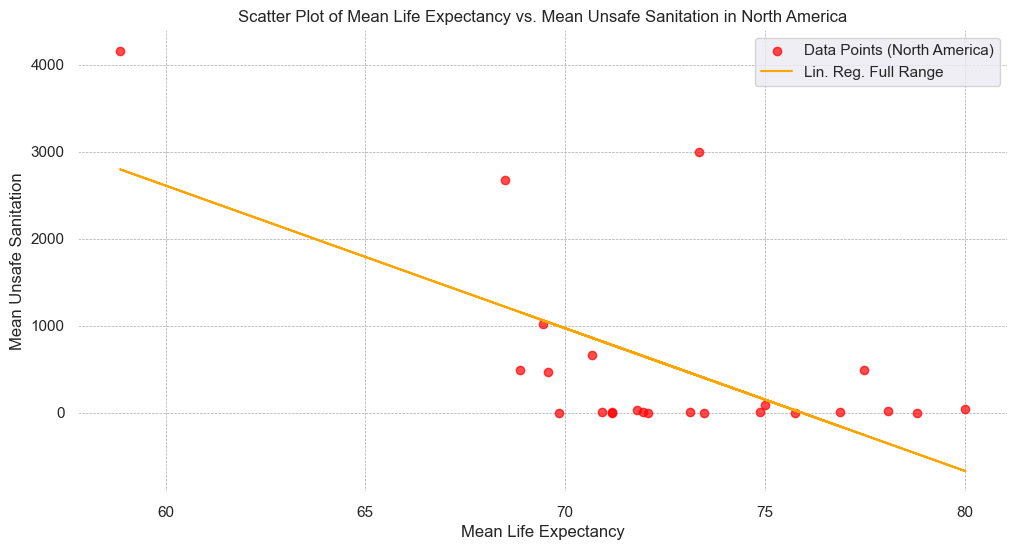

Correlation coefficient for North America: -0.5806780827422378


In [35]:
# Filter data for North America
north_america_df = df_life_risk[df_life_risk['Continent'] == 'North America']

# Calculate the mean of Life Expectancy and Unsafe Sanitation for each country in North America
mean_life_exp_na = north_america_df.groupby('Entity')['Life_Expectancy'].mean()
mean_unsafe_sanitation_na = north_america_df.groupby('Entity')['Unsafe_Sanitation'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp_na, mean_unsafe_sanitation_na, alpha=0.7, label="Data Points (North America)", color='red')

# Linear regression line
lin_reg_m_na, lin_reg_q_na = linear_regression(mean_life_exp_na, mean_unsafe_sanitation_na)
y_na = mean_life_exp_na * lin_reg_m_na + lin_reg_q_na
plt.plot(mean_life_exp_na, y_na, label="Lin. Reg. Full Range", color='orange')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean Unsafe Sanitation in North America')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean Unsafe Sanitation')
plt.show()

# Correlation Coefficient
result_na = correlation_coefficient(north_america_df, "Life_Expectancy", "Unsafe_Sanitation")
print(f"Correlation coefficient for North America: {result_na}")


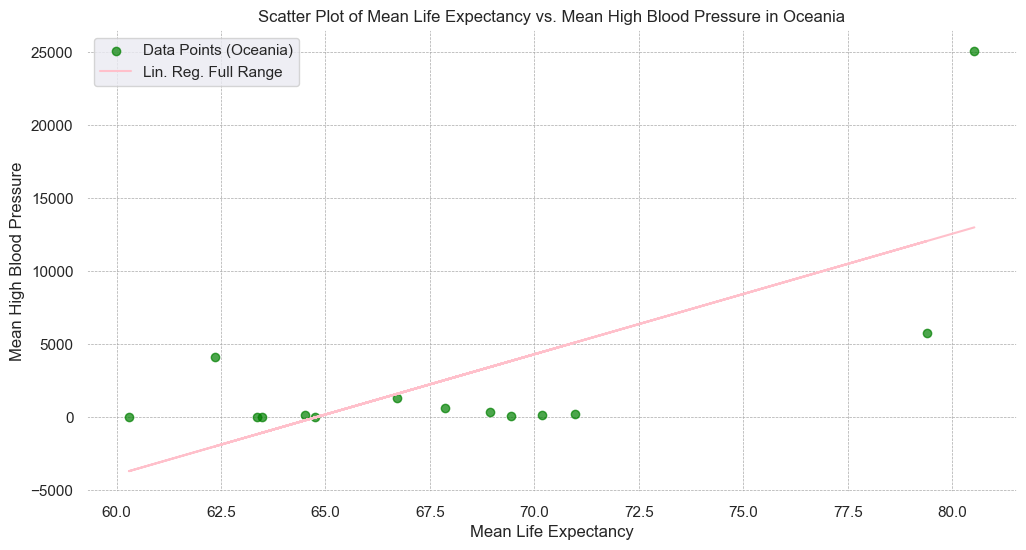

Correlation coefficient for Oceania: 0.6531814073328079


In [36]:
# Filter data for Oceania
oceania_df = df_life_risk[df_life_risk['Continent'] == 'Oceania']

# Calculate the mean of Life Expectancy and High Blood Pressure for each country in Oceania
mean_life_exp_oceania = oceania_df.groupby('Entity')['Life_Expectancy'].mean()
mean_blood_pressure_oceania = oceania_df.groupby('Entity')['High_Blood_Pressure'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp_oceania, mean_blood_pressure_oceania, alpha=0.7, label="Data Points (Oceania)", color='green')

# Linear regression line
lin_reg_m_oceania, lin_reg_q_oceania = linear_regression(mean_life_exp_oceania, mean_blood_pressure_oceania)
y_oceania = mean_life_exp_oceania * lin_reg_m_oceania + lin_reg_q_oceania
plt.plot(mean_life_exp_oceania, y_oceania, label="Lin. Reg. Full Range", color='pink')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean High Blood Pressure in Oceania')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean High Blood Pressure')
plt.show()

# Correlation Coefficient
result_oceania = correlation_coefficient(oceania_df, "Life_Expectancy", "High_Blood_Pressure")
print(f"Correlation coefficient for Oceania: {result_oceania}")


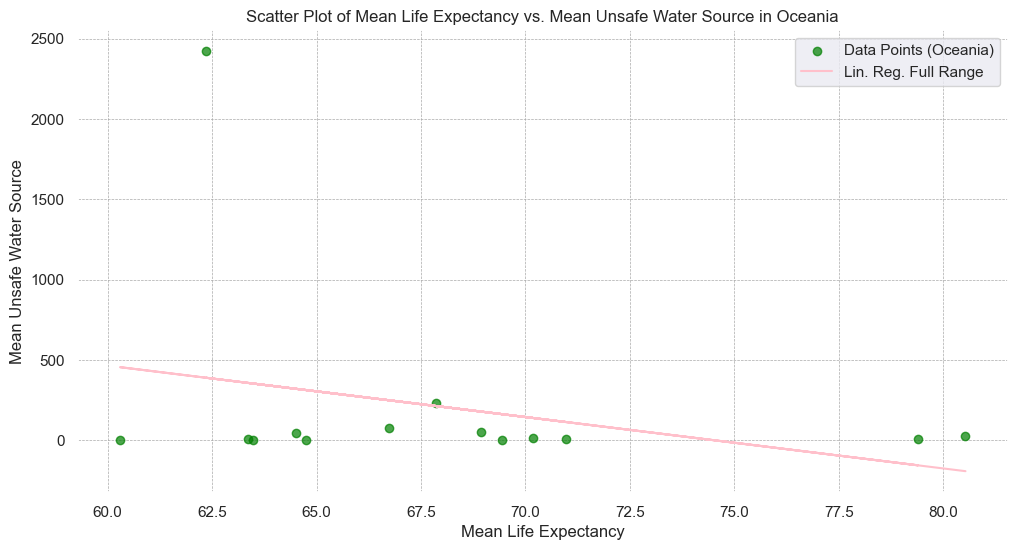

Correlation coefficient for Oceania: -0.2589762495867721


In [48]:
# Filter data for Oceania
oceania_df = df_life_risk[df_life_risk['Continent'] == 'Oceania']

# Calculate the mean of Life Expectancy and Unsafe Water Source for each country in Oceania
mean_life_exp_oceania = oceania_df.groupby('Entity')['Life_Expectancy'].mean()
mean_unsafe_water_oceania = oceania_df.groupby('Entity')['Unsafe_Water_Source'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp_oceania, mean_unsafe_water_oceania, alpha=0.7, label="Data Points (Oceania)", color='green')

# Linear regression line
lin_reg_m_oceania, lin_reg_q_oceania = linear_regression(mean_life_exp_oceania, mean_unsafe_water_oceania)
y_oceania = mean_life_exp_oceania * lin_reg_m_oceania + lin_reg_q_oceania
plt.plot(mean_life_exp_oceania, y_oceania, label="Lin. Reg. Full Range", color='pink')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean Unsafe Water Source in Oceania')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean Unsafe Water Source')
plt.show()

# Correlation Coefficient
result_oceania = correlation_coefficient(oceania_df, "Life_Expectancy", "Unsafe_Water_Source")
print(f"Correlation coefficient for Oceania: {result_oceania}")


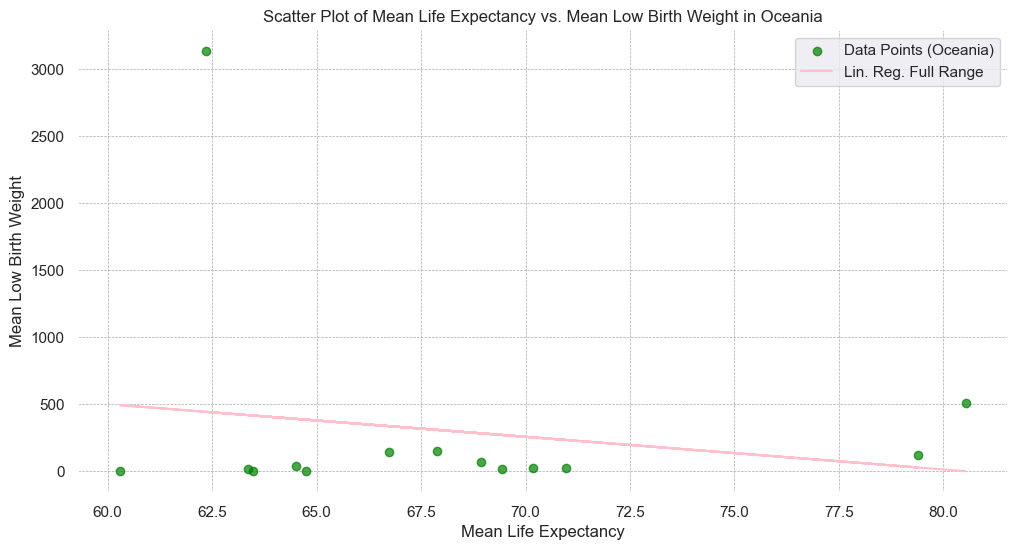

Correlation coefficient for Oceania: -0.14616750463469125


In [49]:
# Filter data for Oceania
oceania_df = df_life_risk[df_life_risk['Continent'] == 'Oceania']

# Calculate the mean of Life Expectancy and Low Birth Weight for each country in Oceania
mean_life_exp_oceania = oceania_df.groupby('Entity')['Life_Expectancy'].mean()
mean_low_birth_weight_oceania = oceania_df.groupby('Entity')['Low_Birth_Weight'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp_oceania, mean_low_birth_weight_oceania, alpha=0.7, label="Data Points (Oceania)", color='green')

# Linear regression line
lin_reg_m_oceania, lin_reg_q_oceania = linear_regression(mean_life_exp_oceania, mean_low_birth_weight_oceania)
y_oceania = mean_life_exp_oceania * lin_reg_m_oceania + lin_reg_q_oceania
plt.plot(mean_life_exp_oceania, y_oceania, label="Lin. Reg. Full Range", color='pink')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean Low Birth Weight in Oceania')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean Low Birth Weight')
plt.show()

# Correlation Coefficient
result_oceania = correlation_coefficient(oceania_df, "Life_Expectancy", "Low_Birth_Weight")
print(f"Correlation coefficient for Oceania: {result_oceania}")


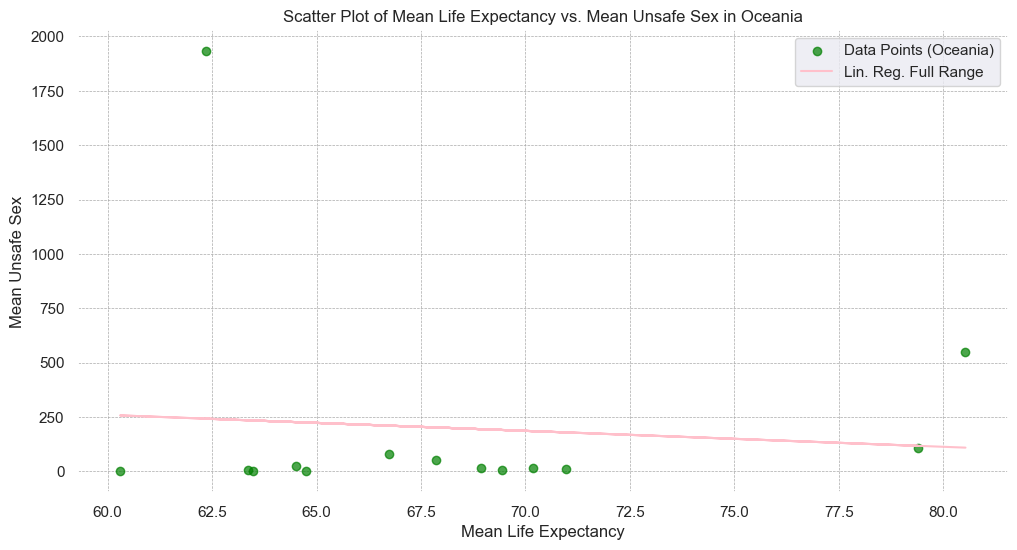

Correlation coefficient for Oceania: -0.028401300329405185


In [53]:
# Filter data for Oceania
oceania_df = df_life_risk[df_life_risk['Continent'] == 'Oceania']

# Calculate the mean of Life Expectancy and Unsafe Sex for each country in Oceania
mean_life_exp_oceania = oceania_df.groupby('Entity')['Life_Expectancy'].mean()
mean_unsafe_sex_oceania = oceania_df.groupby('Entity')['Unsafe_Sex'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp_oceania, mean_unsafe_sex_oceania, alpha=0.7, label="Data Points (Oceania)", color='green')

# Linear regression line
lin_reg_m_oceania, lin_reg_q_oceania = linear_regression(mean_life_exp_oceania, mean_unsafe_sex_oceania)
y_oceania = mean_life_exp_oceania * lin_reg_m_oceania + lin_reg_q_oceania
plt.plot(mean_life_exp_oceania, y_oceania, label="Lin. Reg. Full Range", color='pink')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean Unsafe Sex in Oceania')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean Unsafe Sex')
plt.show()

# Correlation Coefficient
result_oceania = correlation_coefficient(oceania_df, "Life_Expectancy", "Unsafe_Sex")
print(f"Correlation coefficient for Oceania: {result_oceania}")


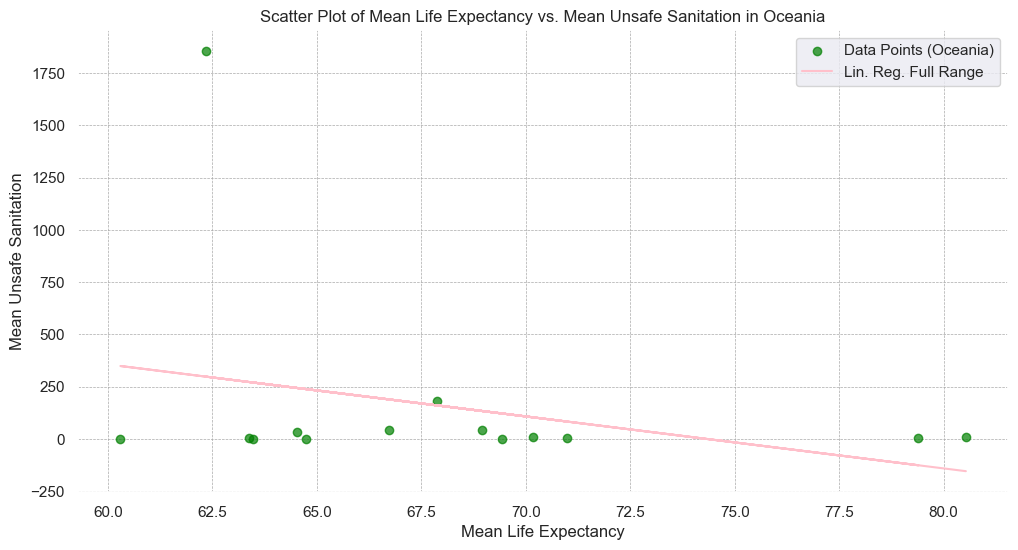

Correlation coefficient for Oceania: -0.2632825923702932


In [51]:
# Filter data for Oceania
oceania_df = df_life_risk[df_life_risk['Continent'] == 'Oceania']

# Calculate the mean of Life Expectancy and Unsafe Sanitation for each country in Oceania
mean_life_exp_oceania = oceania_df.groupby('Entity')['Life_Expectancy'].mean()
mean_unsafe_sanitation_oceania = oceania_df.groupby('Entity')['Unsafe_Sanitation'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp_oceania, mean_unsafe_sanitation_oceania, alpha=0.7, label="Data Points (Oceania)", color='green')

# Linear regression line
lin_reg_m_oceania, lin_reg_q_oceania = linear_regression(mean_life_exp_oceania, mean_unsafe_sanitation_oceania)
y_oceania = mean_life_exp_oceania * lin_reg_m_oceania + lin_reg_q_oceania
plt.plot(mean_life_exp_oceania, y_oceania, label="Lin. Reg. Full Range", color='pink')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean Unsafe Sanitation in Oceania')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean Unsafe Sanitation')
plt.show()

# Correlation Coefficient
result_oceania = correlation_coefficient(oceania_df, "Life_Expectancy", "Unsafe_Sanitation")
print(f"Correlation coefficient for Oceania: {result_oceania}")


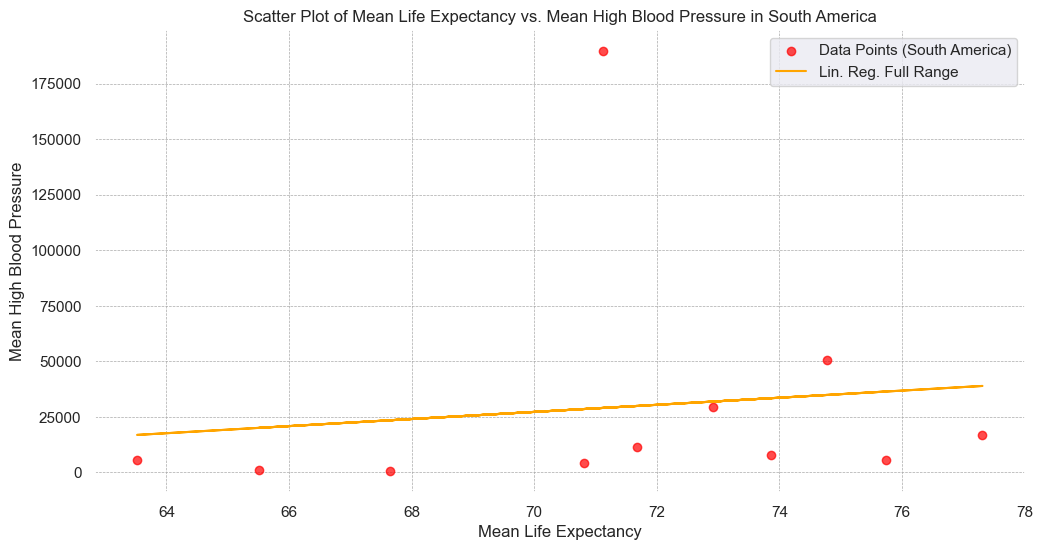

Correlation coefficient for South America: 0.13879072321351227


In [54]:
# Filter data for South America
south_america_df = df_life_risk[df_life_risk['Continent'] == 'South America']

# Calculate the mean of Life Expectancy and High Blood Pressure for each country in South America
mean_life_exp_south_america = south_america_df.groupby('Entity')['Life_Expectancy'].mean()
mean_blood_pressure_south_america = south_america_df.groupby('Entity')['High_Blood_Pressure'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp_south_america, mean_blood_pressure_south_america, alpha=0.7, label="Data Points (South America)", color='red')

# Linear regression line
lin_reg_m_south_america, lin_reg_q_south_america = linear_regression(mean_life_exp_south_america, mean_blood_pressure_south_america)
y_south_america = mean_life_exp_south_america * lin_reg_m_south_america + lin_reg_q_south_america
plt.plot(mean_life_exp_south_america, y_south_america, label="Lin. Reg. Full Range", color='orange')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean High Blood Pressure in South America')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean High Blood Pressure')
plt.show()

# Correlation Coefficient
result_south_america = correlation_coefficient(south_america_df, "Life_Expectancy", "High_Blood_Pressure")
print(f"Correlation coefficient for South America: {result_south_america}")


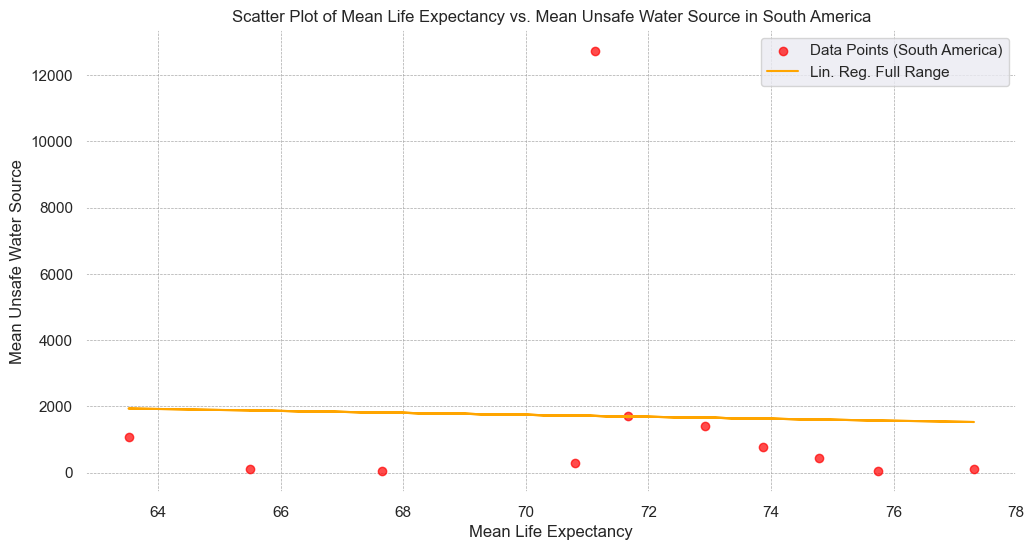

Correlation coefficient for South America: -0.16690825090303305


In [42]:
# Filter data for South America
south_america_df = df_life_risk[df_life_risk['Continent'] == 'South America']

# Calculate the mean of Life Expectancy and Unsafe Water Source for each country in South America
mean_life_exp_south_america = south_america_df.groupby('Entity')['Life_Expectancy'].mean()
mean_unsafe_water_south_america = south_america_df.groupby('Entity')['Unsafe_Water_Source'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp_south_america, mean_unsafe_water_south_america, alpha=0.7, label="Data Points (South America)", color='red')

# Linear regression line
lin_reg_m_south_america, lin_reg_q_south_america = linear_regression(mean_life_exp_south_america, mean_unsafe_water_south_america)
y_south_america = mean_life_exp_south_america * lin_reg_m_south_america + lin_reg_q_south_america
plt.plot(mean_life_exp_south_america, y_south_america, label="Lin. Reg. Full Range", color='orange')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean Unsafe Water Source in South America')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean Unsafe Water Source')
plt.show()

# Correlation Coefficient
result_south_america = correlation_coefficient(south_america_df, "Life_Expectancy", "Unsafe_Water_Source")
print(f"Correlation coefficient for South America: {result_south_america}")


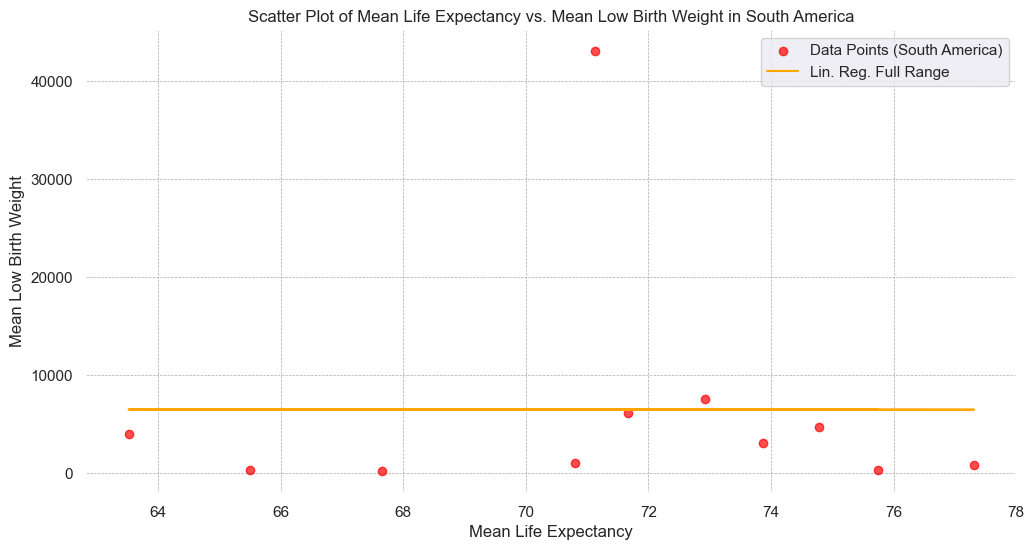

Correlation coefficient for South America: -0.0905264341679427


In [43]:
# Filter data for South America
south_america_df = df_life_risk[df_life_risk['Continent'] == 'South America']

# Calculate the mean of Life Expectancy and Low Birth Weight for each country in South America
mean_life_exp_south_america = south_america_df.groupby('Entity')['Life_Expectancy'].mean()
mean_low_birth_weight_south_america = south_america_df.groupby('Entity')['Low_Birth_Weight'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp_south_america, mean_low_birth_weight_south_america, alpha=0.7, label="Data Points (South America)", color='red')

# Linear regression line
lin_reg_m_south_america, lin_reg_q_south_america = linear_regression(mean_life_exp_south_america, mean_low_birth_weight_south_america)
y_south_america = mean_life_exp_south_america * lin_reg_m_south_america + lin_reg_q_south_america
plt.plot(mean_life_exp_south_america, y_south_america, label="Lin. Reg. Full Range", color='orange')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean Low Birth Weight in South America')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean Low Birth Weight')
plt.show()

# Correlation Coefficient
result_south_america = correlation_coefficient(south_america_df, "Life_Expectancy", "Low_Birth_Weight")
print(f"Correlation coefficient for South America: {result_south_america}")


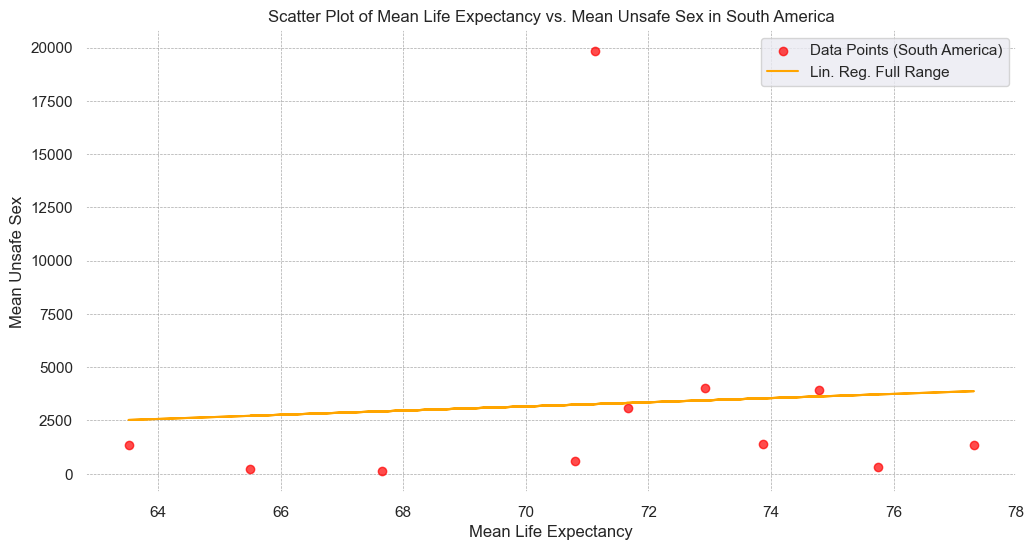

Correlation coefficient for South America: 0.1055539391436125


In [55]:
# Filter data for South America
south_america_df = df_life_risk[df_life_risk['Continent'] == 'South America']

# Calculate the mean of Life Expectancy and Unsafe Sex for each country in South America
mean_life_exp_sa = south_america_df.groupby('Entity')['Life_Expectancy'].mean()
mean_unsafe_sex_sa = south_america_df.groupby('Entity')['Unsafe_Sex'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp_sa, mean_unsafe_sex_sa, alpha=0.7, label="Data Points (South America)", color='red')

# Linear regression line
lin_reg_m_sa, lin_reg_q_sa = linear_regression(mean_life_exp_sa, mean_unsafe_sex_sa)
y_sa = mean_life_exp_sa * lin_reg_m_sa + lin_reg_q_sa
plt.plot(mean_life_exp_sa, y_sa, label="Lin. Reg. Full Range", color='orange')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean Unsafe Sex in South America')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean Unsafe Sex')
plt.show()

# Correlation Coefficient
result_sa = correlation_coefficient(south_america_df, "Life_Expectancy", "Unsafe_Sex")
print(f"Correlation coefficient for South America: {result_sa}")


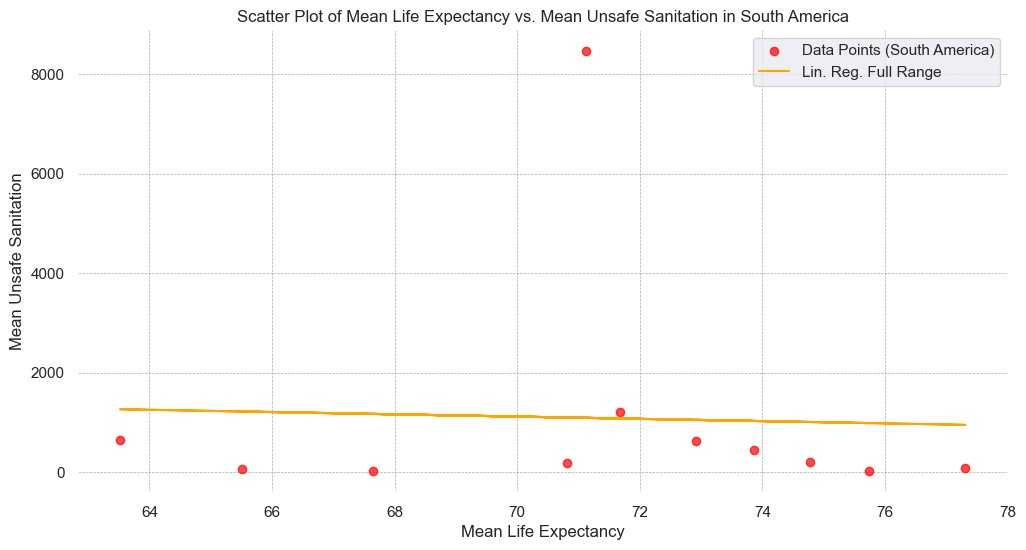

Correlation coefficient for South America: -0.17141358692209008


In [56]:
# Filter data for South America
south_america_df = df_life_risk[df_life_risk['Continent'] == 'South America']

# Calculate the mean of Life Expectancy and Unsafe Sanitation for each country in South America
mean_life_exp_sa = south_america_df.groupby('Entity')['Life_Expectancy'].mean()
mean_unsafe_sanitation_sa = south_america_df.groupby('Entity')['Unsafe_Sanitation'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mean_life_exp_sa, mean_unsafe_sanitation_sa, alpha=0.7, label="Data Points (South America)", color='red')

# Linear regression line
lin_reg_m_sa, lin_reg_q_sa = linear_regression(mean_life_exp_sa, mean_unsafe_sanitation_sa)
y_sa = mean_life_exp_sa * lin_reg_m_sa + lin_reg_q_sa
plt.plot(mean_life_exp_sa, y_sa, label="Lin. Reg. Full Range", color='orange')

# Set background color to white
plt.gca().set_facecolor('white')

# Set grid color to dark grey and grid style to dashed
plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.legend()

plt.title('Scatter Plot of Mean Life Expectancy vs. Mean Unsafe Sanitation in South America')
plt.xlabel('Mean Life Expectancy')
plt.ylabel('Mean Unsafe Sanitation')
plt.show()

# Correlation Coefficient
result_sa = correlation_coefficient(south_america_df, "Life_Expectancy", "Unsafe_Sanitation")
print(f"Correlation coefficient for South America: {result_sa}")


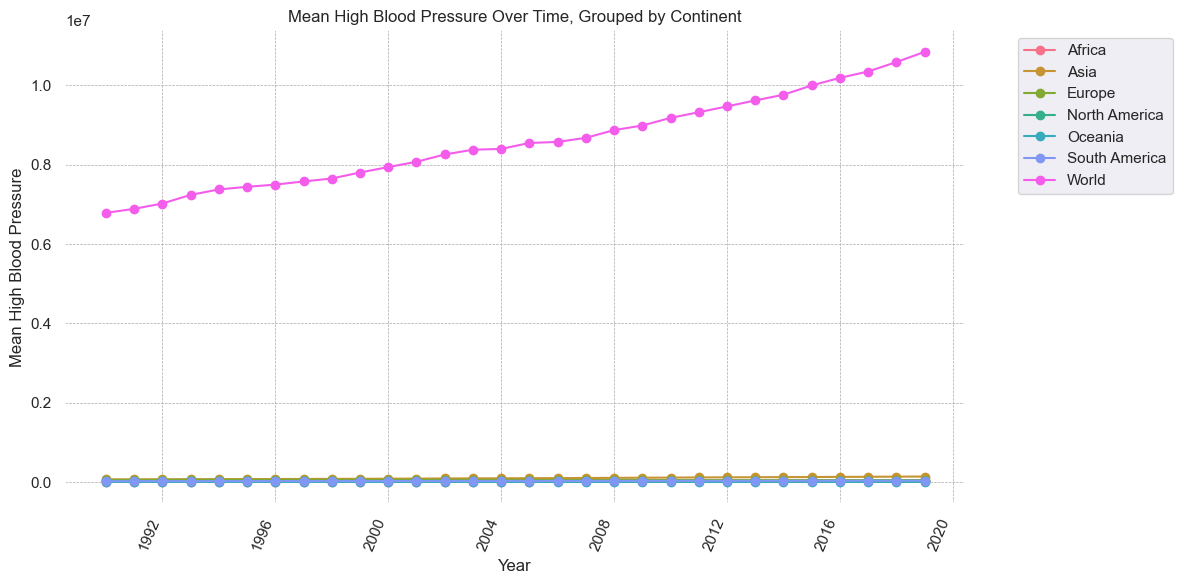

In [46]:
# Convert 'Year' to datetime format
df_life_risk['Year'] = pd.to_datetime(df_life_risk['Year'], format='%Y')

# Using seaborn for a better appearance
sns.set(style="darkgrid")

# Grouping the data by continent and year, calculating the mean high blood pressure
numeric_columns = df_life_risk.select_dtypes(include='number').columns
grouped_df = df_life_risk.groupby(['Continent', 'Year'])[numeric_columns].mean().reset_index()

# Plotting the mean high blood pressure against Year for each continent
plt.figure(figsize=(12, 6))

# Define a color palette for each continent
palette = sns.color_palette("husl", n_colors=len(grouped_df['Continent'].unique()))

for i, (name, group) in enumerate(grouped_df.groupby('Continent')):
    plt.plot(group['Year'], group['High_Blood_Pressure'], marker='o', label=name, color=palette[i])

plt.title('Mean High Blood Pressure Over Time, Grouped by Continent')
plt.xlabel('Year')
plt.ylabel('Mean High Blood Pressure')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Include each year in the plot
plt.xticks(rotation=67.5, ha='right')
plt.grid(True)
plt.tight_layout()

plt.gca().set_facecolor('white')

plt.grid(color='darkgrey', linestyle='dashed', linewidth=0.5)

plt.show()
